# <font color = blue>1. Importing libraries and setting pandas options. </font>

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
pd.set_option('max_rows',120)
pd.set_option('display.float_format','{:,.2f}'.format)

plt.style.use('ggplot')

# <font color = blue>2. Data Import and Cleaning </font>

2.1. Import Loan data from loan.csv

In [3]:
loan_df=pd.read_csv('loan.csv',engine='python')

2.2. Count colulmns with more than 70% of the data is null.

In [4]:
# number of columns more than 70% missing information
(round(100*(loan_df.isnull().sum()/len(loan_df.index)),2)>70).sum()

56

2.3. Remove the columns with more than 70% data is null and strip loan_status for spaces and make it upper case

In [5]:
loan_cleaned_df=loan_df.drop(loan_df.columns[round(100*(loan_df.isnull().sum()/len(loan_df.index)),2)>= 70],axis=1)
loan_cleaned_df['loan_status']= loan_cleaned_df['loan_status'].str.upper().str.strip()

2.4. Remove columns with unique value equal to 1 as the columns can be inferred.

In [6]:
#remove columns with only 1 unique value as it cant be used to analysis.
loan_cleaned_df = loan_cleaned_df.loc[:,loan_cleaned_df.nunique()>1]

2.5. Replce NA's from column emp_length with 0   

In [7]:
loan_cleaned_df.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [8]:
loan_cleaned_df.emp_length.fillna('0',inplace=True)

loan_cleaned_df.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
0            1075
Name: emp_length, dtype: int64

2.6. Finalized the other columns to be kept post brainstroming with Team mates based on business knowledge

In [9]:

loan_cleaned_df=loan_cleaned_df[["loan_amnt","funded_amnt","term","int_rate","sub_grade","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","purpose","addr_state","dti","delinq_2yrs","earliest_cr_line","mths_since_last_delinq","open_acc","pub_rec","revol_bal","revol_util","total_acc","out_prncp","total_pymnt","total_rec_prncp","recoveries","last_pymnt_d","pub_rec_bankruptcies"]]

# Change interest rate to numeric

loan_cleaned_df['int_rate']= loan_cleaned_df['int_rate'].str.rstrip('%').astype(float)

2.7. Derived columns  
-    Loan_income_ratio as it give more insgiths on cutomer spending behaviour  
-    splitting date into year and month will help in inferencing.

In [10]:
loan_cleaned_df['loan_income_ratio']= loan_cleaned_df['loan_amnt']/loan_cleaned_df['annual_inc']

In [11]:
loan_cleaned_df['issue_month'],loan_cleaned_df['issue_year'] = loan_cleaned_df['issue_d'].str.split('-', 1).str
loan_cleaned_df[['issue_d','issue_month','issue_year']].head()

,issue_d,issue_month,issue_year
0,Dec-11,Dec,11
1,Dec-11,Dec,11
2,Dec-11,Dec,11
3,Dec-11,Dec,11
4,Dec-11,Dec,11


2.8. Ordering and binning  
-     Ordering the months in issue_month because data will be sorted as A-Z sequence but we need Jan -Dec  
-     Binning the loan_amount for plotting ease  
-     Binning the Annual_inc for plotting ease 
-     Binning the Interest rate for plotting ease

In [12]:
months_order = ["Jan", "Feb", "Mar", "Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
#loan_cleaned_df['issue_month']=
pd.Categorical(loan_cleaned_df['issue_month'],ordered = True, categories=months_order)

[Dec, Dec, Dec, Dec, Dec, ..., Jul, Jul, Jul, Jul, Jun]
Length: 39717
Categories (12, object): [Jan < Feb < Mar < Apr ... Sep < Oct < Nov < Dec]

In [13]:
# finding percetile to limit the range
quanta=[.1,.2,.3,.4,.5,.6,.7,.75,.85,.9,.95,.99]
loan_cleaned_df['loan_amnt'].quantile(quanta)

0.10    3,200.00
0.20    5,000.00
0.30    6,000.00
0.40    8,000.00
0.50   10,000.00
0.60   12,000.00
0.70   14,000.00
0.75   15,000.00
0.85   20,000.00
0.90   22,000.00
0.95   25,000.00
0.99   35,000.00
Name: loan_amnt, dtype: float64

- Considering 95 percentile i.e 25000  any thing greater than that is considered as 25000 and above in range variable

In [14]:
bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
ranges = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
loan_cleaned_df['loan_amnt_range'] = pd.cut(loan_cleaned_df['loan_amnt'], bins, labels=ranges)

- Considering 85 percentile i.e 1000000  any thing greater than that is considered as 1000000 and above in range variable

In [15]:
loan_cleaned_df['annual_inc'].quantile(quanta)

0.10    30,000.00
0.20    37,500.00
0.30    45,000.00
0.40    50,400.00
0.50    59,000.00
0.60    65,844.40
0.70    75,600.00
0.75    82,300.00
0.85   100,000.00
0.90   116,000.00
0.95   142,000.00
0.99   234,999.36
Name: annual_inc, dtype: float64

In [16]:
bins = [0, 25000, 50000, 75000, 100000,1000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
loan_cleaned_df['annual_inc_range'] = pd.cut(loan_cleaned_df['annual_inc'], bins, labels=slot)

- Considering 85 percentile i.e 15%  any thing greater than that is considered as 15% and above in solt variable

In [17]:
loan_cleaned_df['int_rate'].quantile(quanta)

0.10    7.14
0.20    7.90
0.30    9.99
0.40   10.99
0.50   11.86
0.60   12.87
0.70   13.92
0.75   14.59
0.85   16.00
0.90   16.89
0.95   18.54
0.99   20.99
Name: int_rate, dtype: float64

In [18]:
bins = [0, 7.5, 10, 12.5, 15,20]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15 and above']
loan_cleaned_df['int_rate_range'] = pd.cut(loan_cleaned_df['int_rate'], bins, labels=slot)

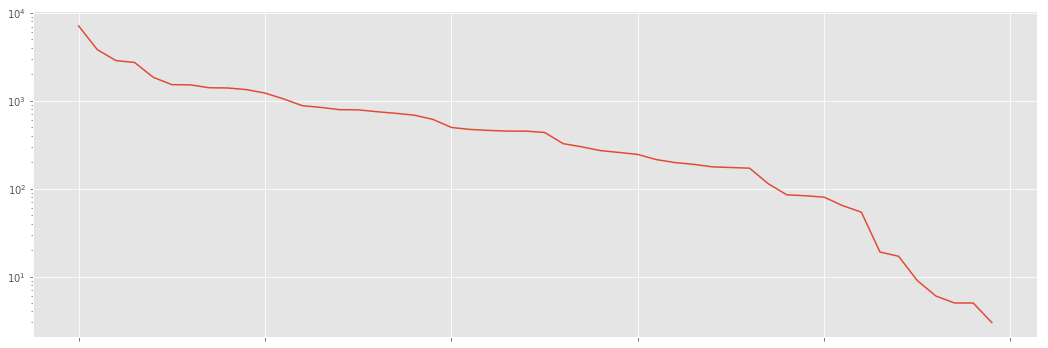

In [19]:
# Power Law distribution for region wise count with log scale

plt.rc("figure", figsize=(18, 6))
fig, ax = plt.subplots()
plt.yscale('log')
loan_cleaned_df['addr_state'].value_counts().plot(ax=ax)

# <font color = blue>3. Univariate Analysis </font>

3.1  Loan Amount  

  -  10000\\$ is the median of the population.  
  -  The maximun number of loans applied between 6000-15000\\$

Text(0.5,1,'Loan_Amnt')

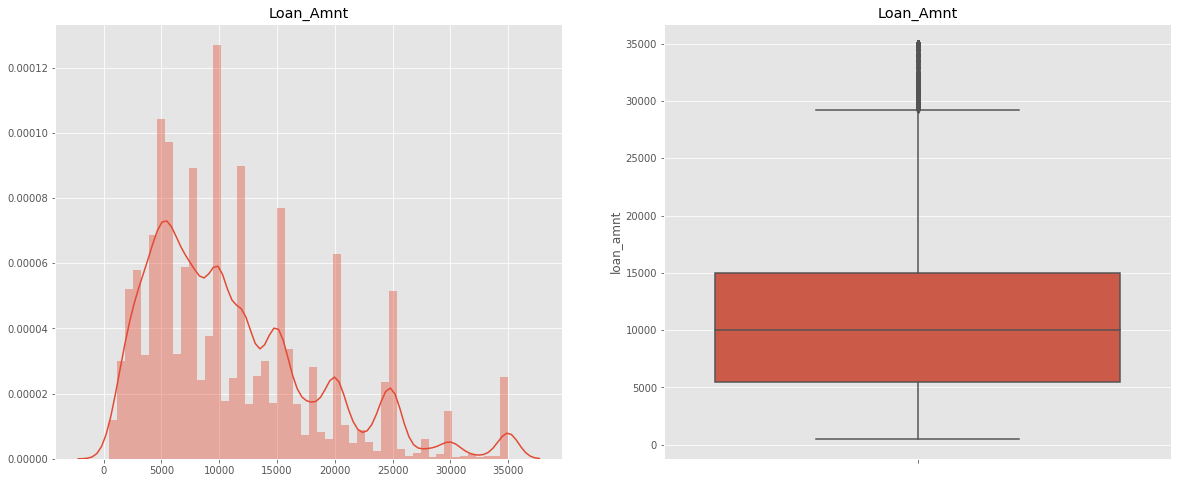

In [20]:
fig, ax=plt.subplots(nrows=1,ncols=2,figsize=(20,8))
ax[0]=sns.distplot(tuple(loan_cleaned_df['loan_amnt']),ax=ax[0])
ax[1]=sns.boxplot(data=loan_cleaned_df,x='loan_amnt',ax=ax[1],orient='vertrical')
ax[1].set_title('Loan_Amnt')
ax[0].set_title('Loan_Amnt')

Text(0.5,1,'Loan Amnt')

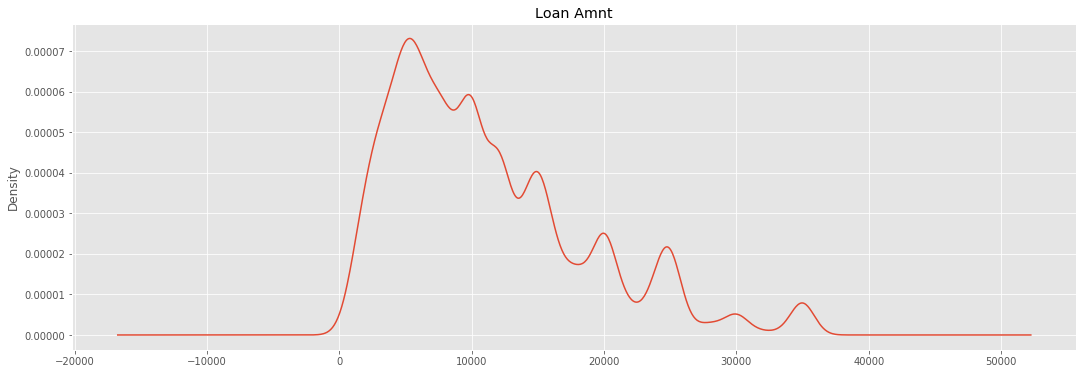

In [21]:
# density plot for loan_amnt column

loan_cleaned_df['loan_amnt'].plot.density() 
plt.title('Loan Amnt')

3.2. Annual Income

  -  Removing all outliers i.e more than 99.3 percentile as it hardly contributing to 0.83 % of all the charged off amount and affecting the population mean to large extent.  
  -  99.3 percentile coming to 269975 Dollar because data points effecting the data starting after 25000 Dollars
  -  The histograms is showing right skewed data after remvoed the outliers i.e.more than 99.3 percentile. It means it move the mean is increased and cant be considered for any analysis as it will give wrong information.
  - Most of the annual income is between 40000\\$ to 90000\\$ approx annually.

In [22]:
loan_cleaned_df['annual_inc'].quantile(.993)

269975.9999999951

In [23]:
# percentage contribution of data more than 99.3 pecentile in overall population.

100*(loan_cleaned_df.loc[(loan_cleaned_df['annual_inc'] > loan_cleaned_df['annual_inc'].quantile(.993)),\
                    ['loan_status','loan_amnt']].groupby(by=['loan_status'])\
.agg({'loan_status':'count','loan_amnt':'sum'}))/loan_cleaned_df.\
groupby(by=['loan_status']).agg({'loan_status':'count','loan_amnt':'sum'})


,loan_status,loan_amnt
loan_status,,
CHARGED OFF,0.52,0.83
CURRENT,0.79,1.12
FULLY PAID,0.73,1.29


Text(0.5,1,'Annual income After removing outliers')

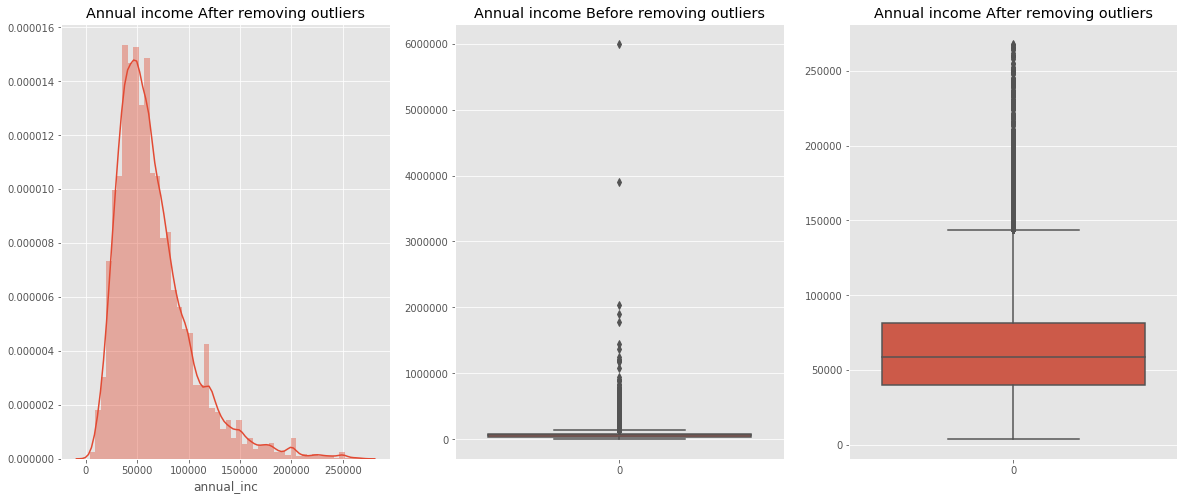

In [24]:
fig, ax=plt.subplots(nrows=1,ncols=3,figsize=(20,8))
ax[0]=sns.distplot(loan_cleaned_df.loc[loan_cleaned_df['annual_inc'] < loan_cleaned_df['annual_inc'].quantile(.993),'annual_inc'],ax=ax[0])
ax[1]=sns.boxplot(data=loan_cleaned_df['annual_inc'],ax=ax[1],orient='v')
ax[1].set_title('Annual income Before removing outliers')

loan_cleaned_df=loan_cleaned_df[loan_cleaned_df['annual_inc'] < loan_cleaned_df['annual_inc'].quantile(.993)]

ax[2]=sns.boxplot(data=loan_cleaned_df['annual_inc'],ax=ax[2],orient='v')
ax[2].set_title('Annual income After removing outliers')
ax[0].set_title('Annual income After removing outliers')

3.3. Interest Rates
  - Most of the borrowers are charged between 9% to 15% annually approx

Text(0.5,1,'Int_rate')

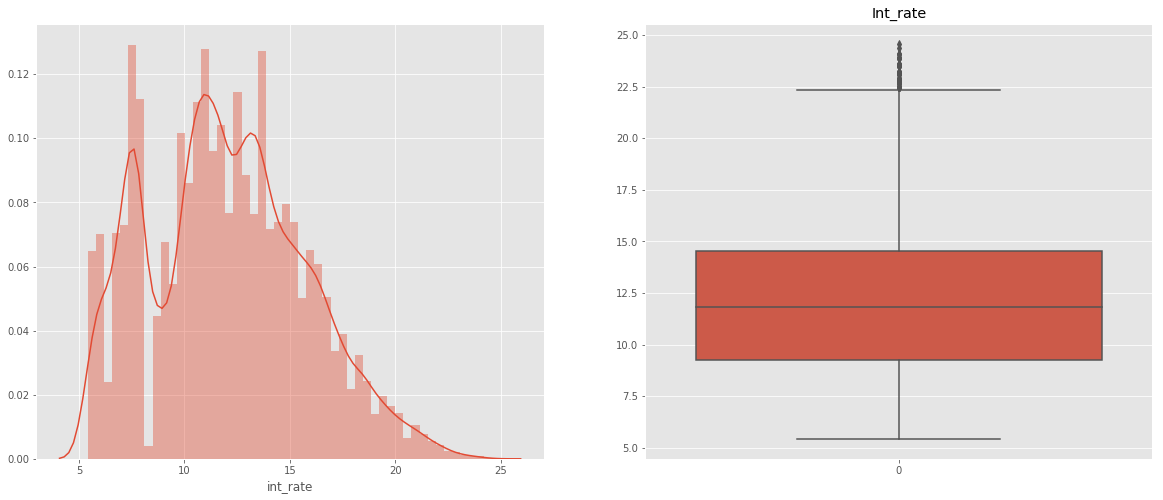

In [25]:
fig, ax=plt.subplots(nrows=1,ncols=2,figsize=(20,8))
ax[0]=sns.distplot(loan_cleaned_df['int_rate'],ax=ax[0])
ax[1]=sns.boxplot(data=loan_cleaned_df['int_rate'],ax=ax[1],orient='vertical')
#ax[1,0]=
ax[1].set_title('Int_rate')
#ax[1,1]=sns.countplot(data=loan_cleaned_df,x='sub_grade',order=loan_cleaned_df['sub_grade'].value_counts().index,ax=ax[1,1])

3.4. Replotting all the Numeric charts using for loop. Inference are provided below for the charts not covered in 3.1 till 3.3.
  -  DTI(debt to income ratio): Most of the applicant DTI is between 8-19, the less the better.Less ratio is favorable for applicant.
  - Open Credit Line (open_acc):  Most of the applicant has 5-12 cerdit line.
  

In [26]:
numeri=['loan_amnt', 'annual_inc','dti','open_acc', 'revol_bal','total_acc','total_pymnt', 'total_rec_prncp' ]

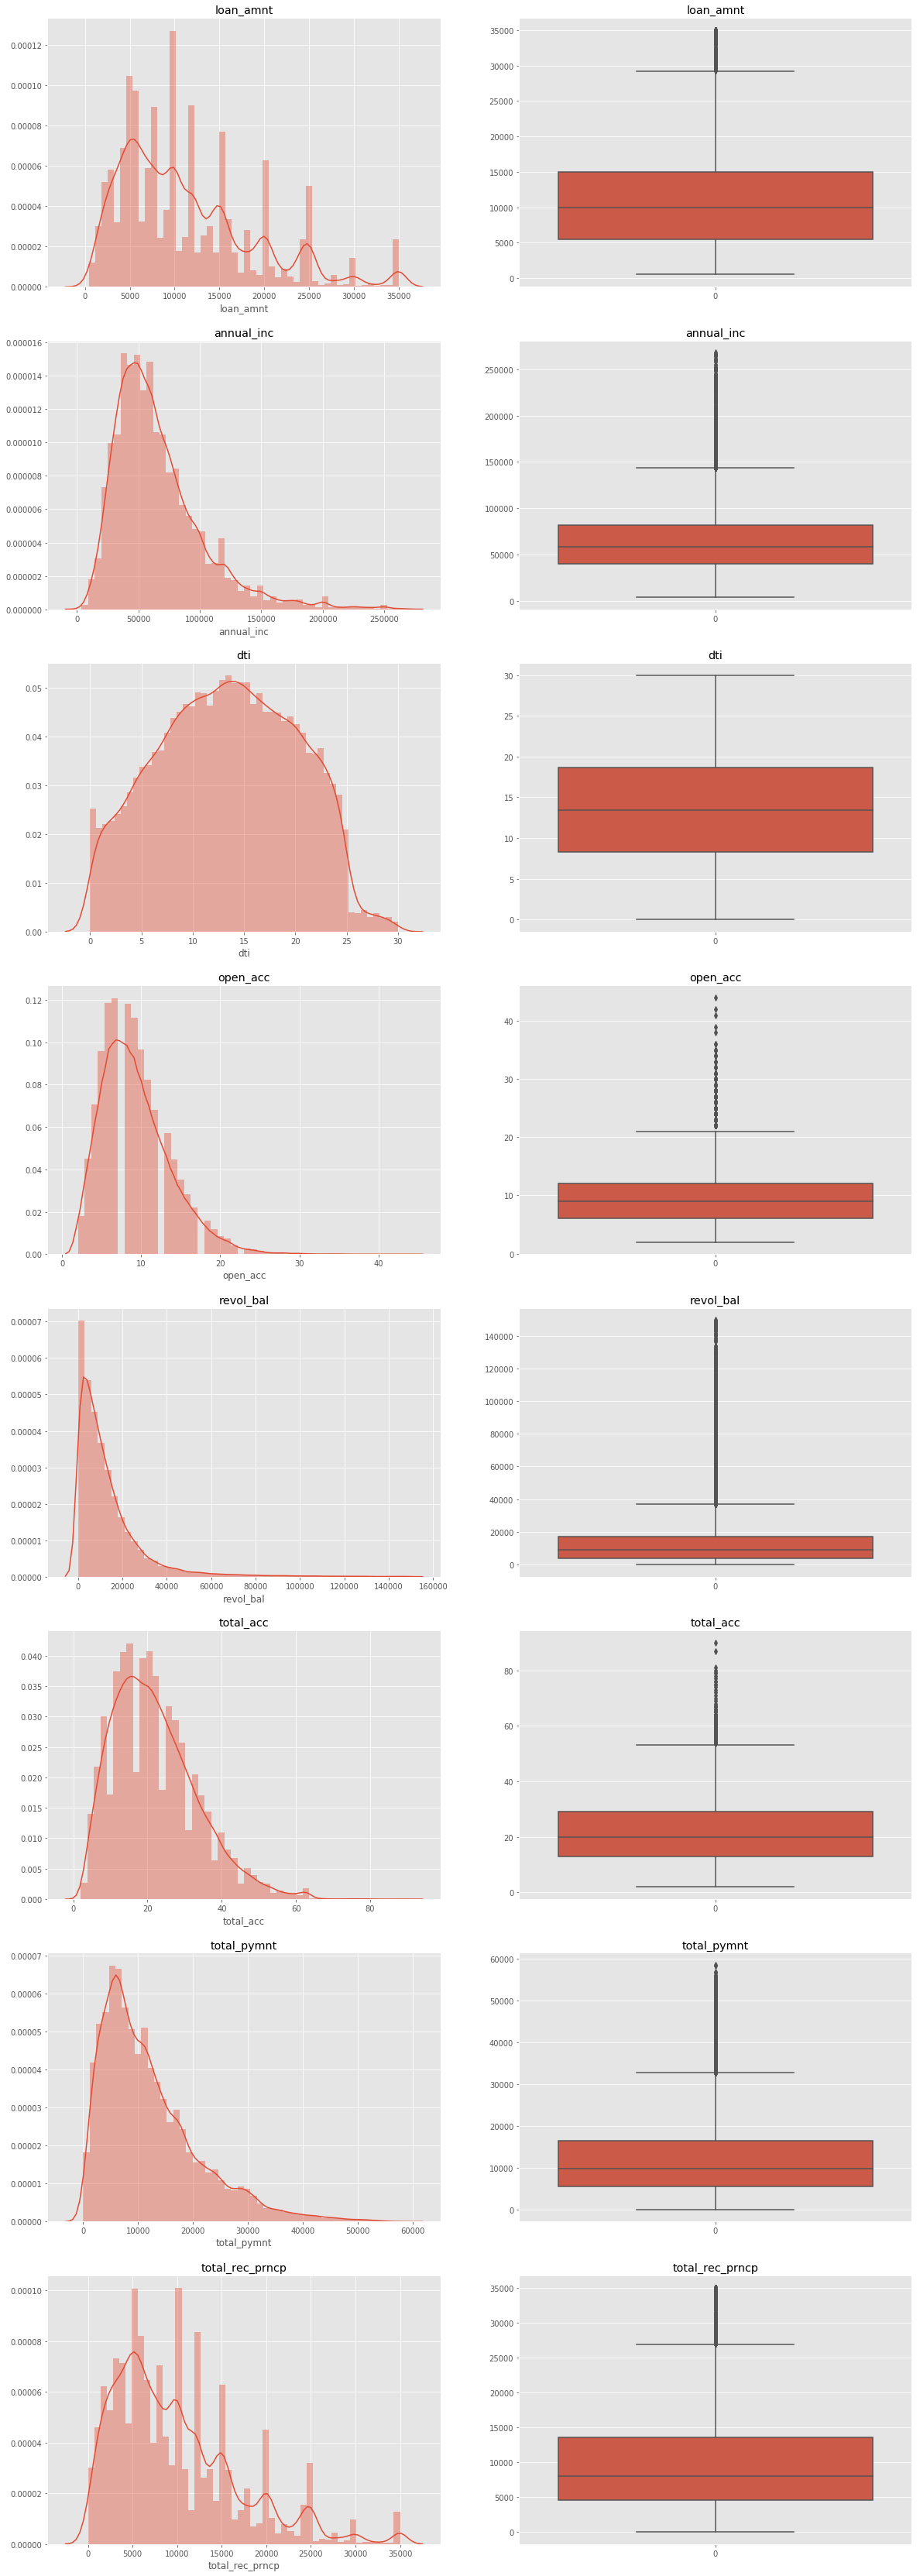

In [27]:
fig, ax=plt.subplots(nrows=len(numeri),ncols=2,figsize=(20,60))
c=0
plt.subplots_adjust(hspace=.2)
for i in numeri:
    #plt.figure()
    ax[c,0]=sns.distplot(loan_cleaned_df[i],ax=ax[c,0])
    ax[c,0].set_title(i)
    #plt.figure()
    ax[c,1]=sns.boxplot(data=loan_cleaned_df[i],ax=ax[c,1],orient='vertical')
    ax[c,1].set_title(i)
    c=c+1

# <font color = blue> 4. Categorical Analysis</font>

4.1. Sub Grade
  - 7.3% of borrower sub-graded in B3, followed by A5,A4,B5.

In [28]:
loan_cleaned_df['sub_grade'].value_counts().sort_index().index

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2',
       'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4',
       'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

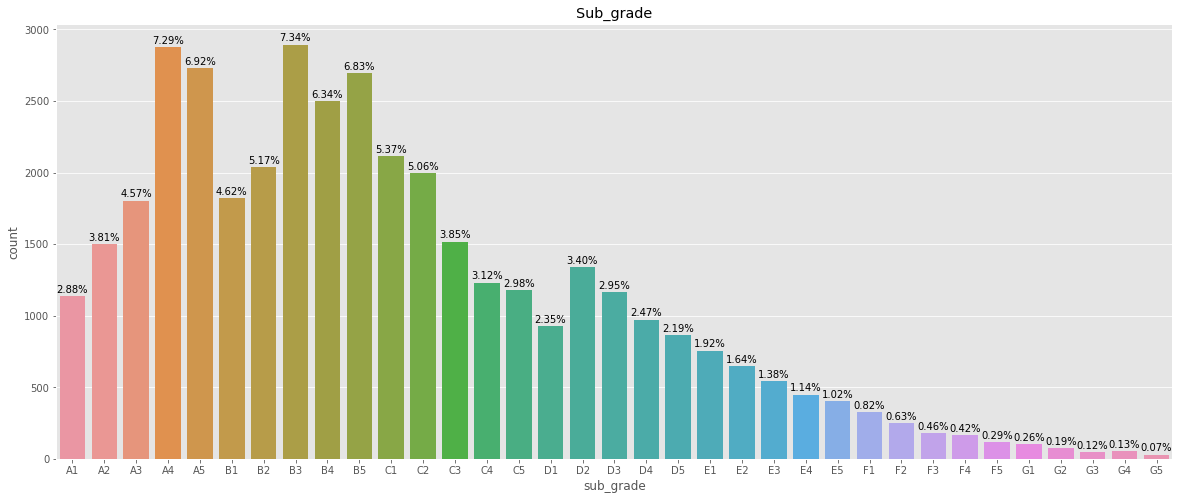

In [29]:
plt.figure(figsize=(20,8))
ax=sns.countplot(data=loan_cleaned_df,x='sub_grade',order=loan_cleaned_df['sub_grade'].value_counts().sort_index().index)
for a in ax.patches:
    ax.annotate('{:.2f}%'.format((a.get_height()*100)/float(len(loan_cleaned_df))), (a.get_x()+(a.get_width()/2)-.5, a.get_height()+25))
    ax.set_title('Sub_grade')


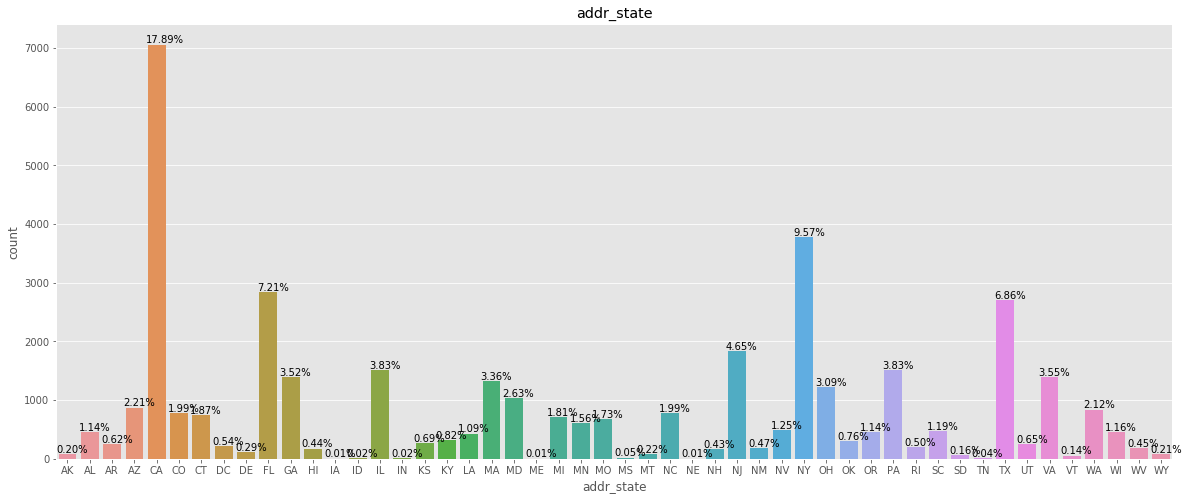

In [30]:
plt.figure(figsize=(20,8))
ax=sns.countplot(data=loan_cleaned_df,x='addr_state',order=loan_cleaned_df['addr_state'].value_counts().sort_index().index)
for a in ax.patches:
    ax.annotate('{:.2f}%'.format((a.get_height()*100)/float(len(loan_cleaned_df))), (a.get_x()+(a.get_width()/2)-.5, a.get_height()+25))
    ax.set_title('addr_state')

4.2. Plotting remaning graphs using for loop, to ease the efforts of creating the charts.
 - Loan term: 73% of the applicant opted for 36 months loan tenure
 - Employe length : Out of total application 22% aplied by 10+ years of experience followed by 2 and 1 years.
 - Home_ownership: out of total applications 47% aplied by people have rented home, followed by 44% of Mortage homes.
 - Verification status: 25% applicants income source verified,32% verified by Lending club,42 % not verified
 - Issue month: 30% of the loans issued in last quater of the year.
 - Issue year: 54% of the total loans are issued in 2011.
 - Purpose: 47% of the applicant mentioned debt_consolidation as loan purpose
 - add_state: Maximun number of loans issued to Calorfication state related borrowers.
 - delinq_2yrs: 89% of the applicant doesnt have any record in last 2 years.
 - loan_status:14% of total loans are charged off
 - pub_rec: 94% of people dont have derogatory.

In [31]:
cat=[ 'term', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_month','issue_year','purpose','addr_state','delinq_2yrs','loan_status','pub_rec'] #, , , , , \             'earliest_cr_line', 'mths_since_last_delinq', 'open_acc',\             , 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',\             'total_pymnt', 'total_rec_prncp', 'recoveries'

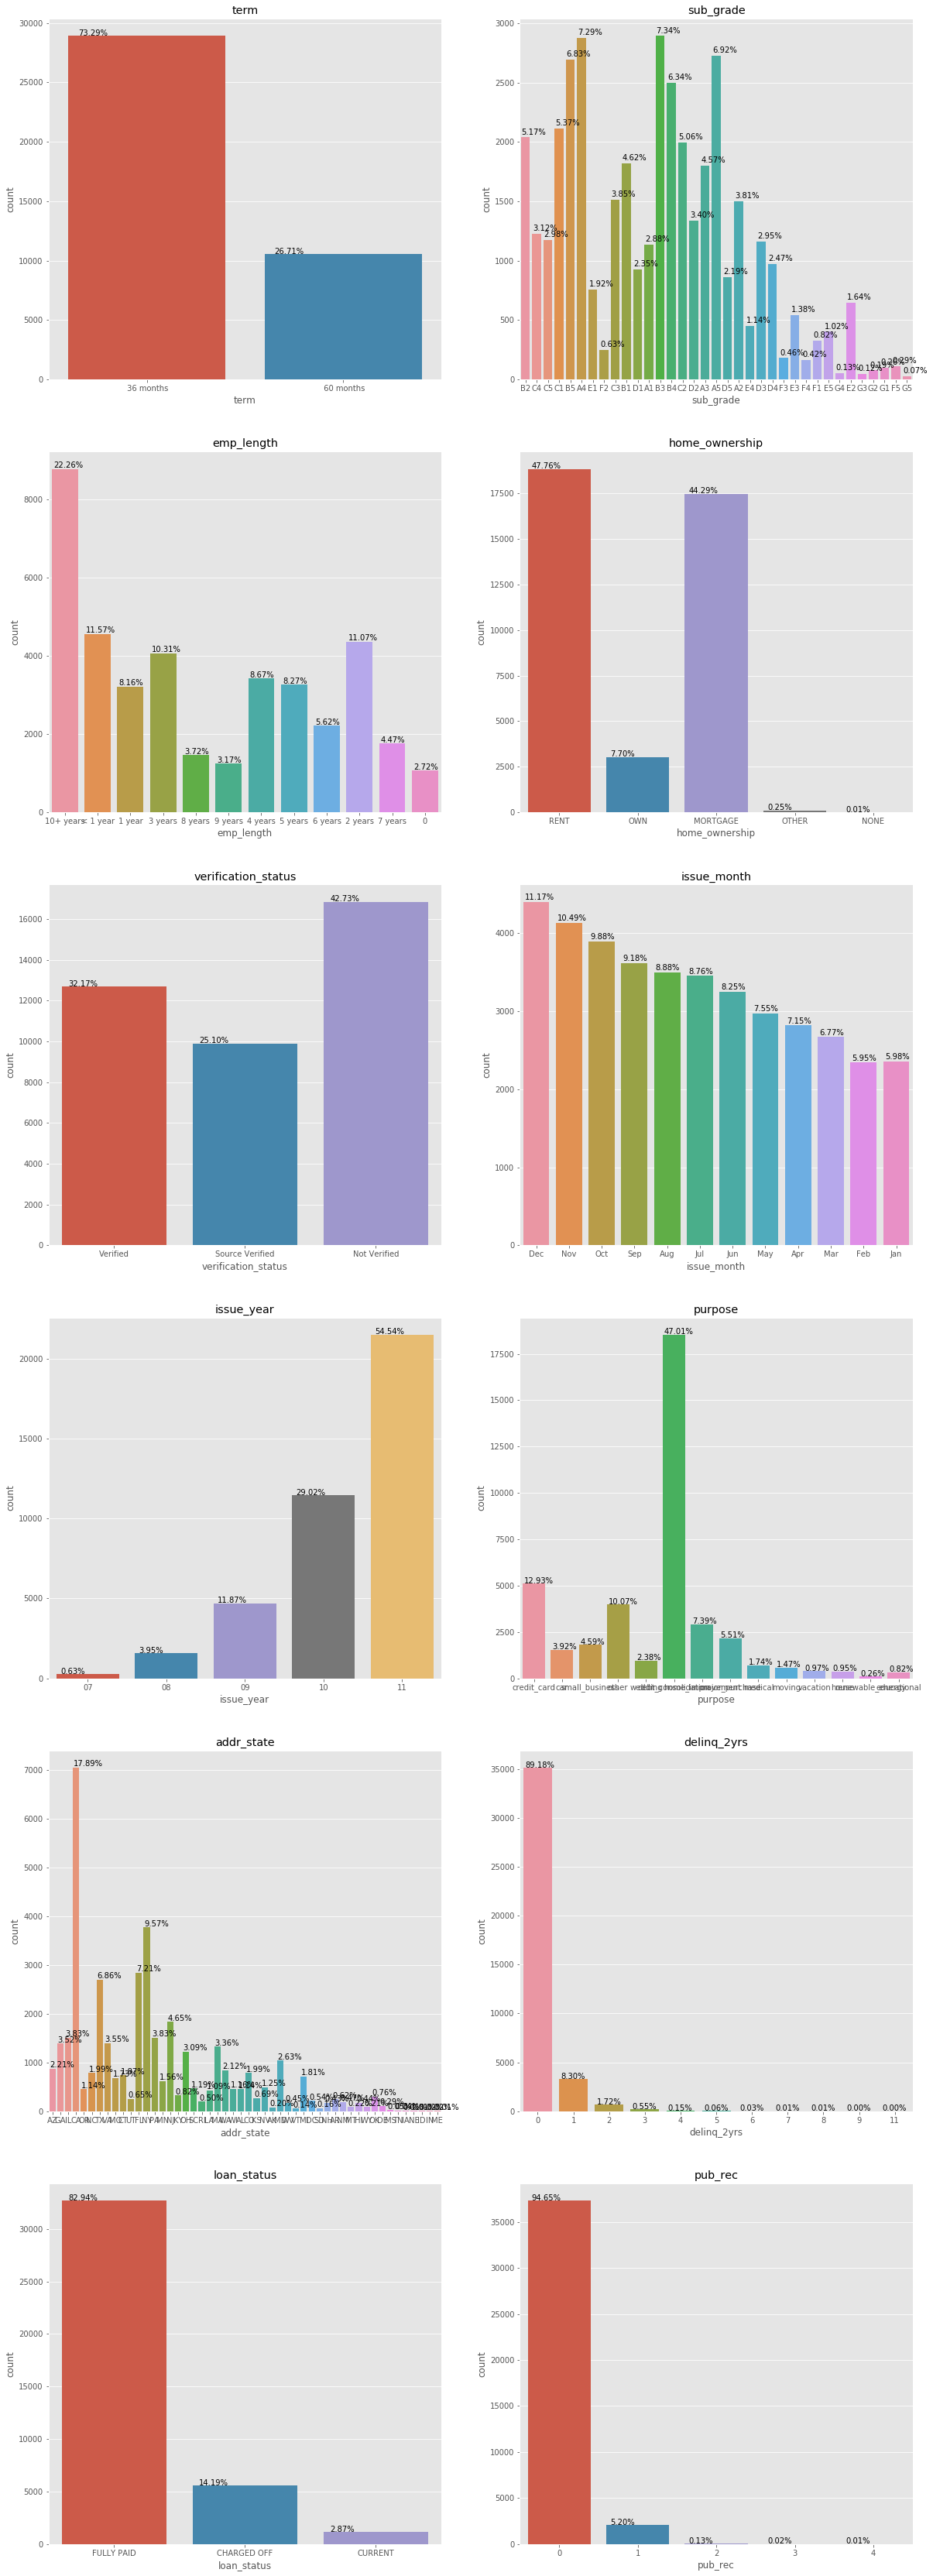

In [32]:
#fig, ax=plt.subplots(nrows=1,ncols=2,figsize=(20,8))

#ax[0]=sns.boxplot(data=loan_cleaned_df['int_rate'],ax=ax[1],orient='vertical')
fig, ax=plt.subplots(nrows=6,ncols=2,figsize=(20,60))
c=0
j=0
plt.subplots_adjust(hspace=.2)
for i in cat:
    #plt.figure()
    percen=((loan_cleaned_df[i].value_counts()/loan_cleaned_df[i].count())*100).sort_index()
    if j>1:
        j=0
        c=c+1
    #ax[c,j]=percen.plot(kind='bar',ax=ax[c,j],sort_columns=True,rot=0)#,\
    ax[c,j]= sns.countplot(data=loan_cleaned_df,x=i,ax=ax[c,j])#,hue='issue_year')
    
    #order=percen.index,\
    #ax=ax[c,j]#)
    for a in ax[c,j].patches:
        ax[c,j].annotate('{:.2f}%'.format((a.get_height()*100)/float(len(loan_cleaned_df))), (a.get_x()+.05, a.get_height()+25))
    ax[c,j].set_title(i)
    #ax[c,j].set_xticklabels(loan_cleaned_df[i],rotation=90,fontsize=10)
    
    j=j+1

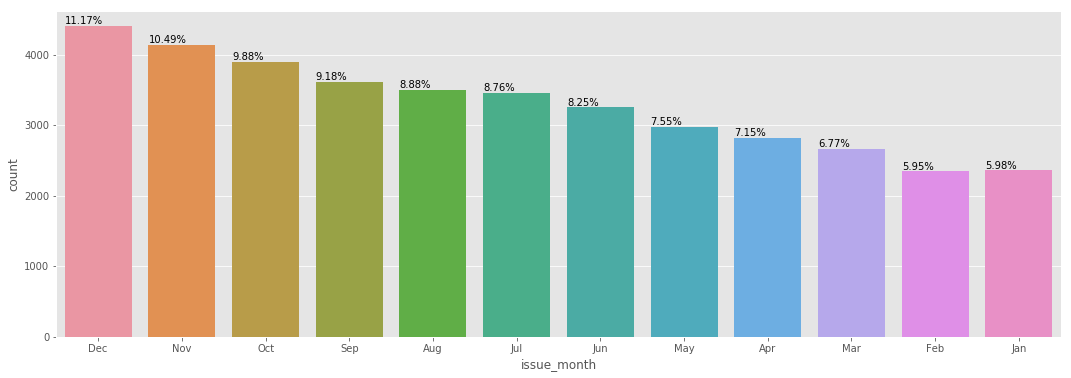

In [33]:
ax=sns.countplot(data=loan_cleaned_df,x='issue_month')#,hue='issue_year')

for a in ax.patches:
    ax.annotate('{:.2f}%'.format((a.get_height()*100)/float(len(loan_cleaned_df))), (a.get_x(), a.get_height()+25))

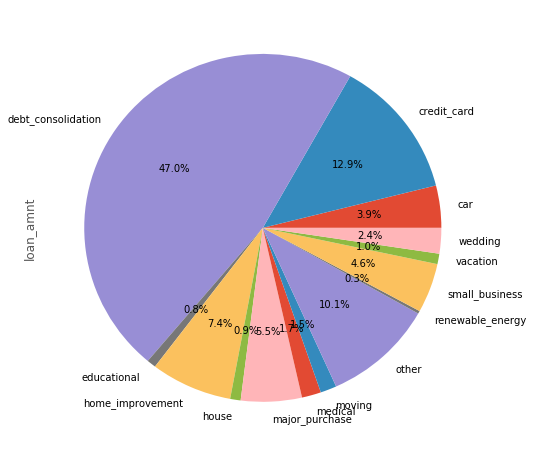

In [34]:
# Pie chart showing the count of loan in different purpose

fig = plt.figure(figsize=(8,8))
ax=loan_cleaned_df.groupby('purpose')['loan_amnt'].count().plot(kind='pie',autopct='%0.1f%%')


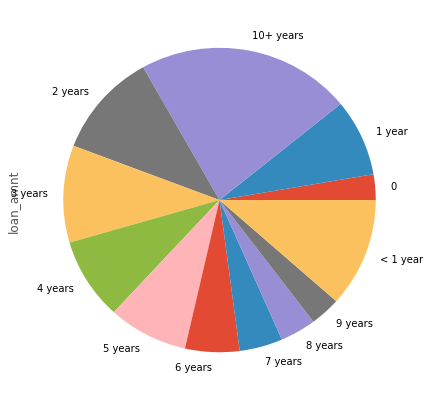

In [35]:
# Pie chart showing the count of loan for different employment_length

fig = plt.figure(figsize=(7,7))
loan_cleaned_df.groupby('emp_length')['loan_amnt'].count().plot(kind='pie')

In [36]:
loan_cleaned_df.purpose.value_counts()

debt_consolidation    18538
credit_card            5101
other                  3971
home_improvement       2913
major_purchase         2173
small_business         1812
car                    1547
wedding                 938
medical                 687
moving                  578
vacation                381
house                   374
educational             324
renewable_energy        101
Name: purpose, dtype: int64

# <font color = blue>5. Bivariate Analysis </font>

5.1. Loan purpose Vs Loan Status

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

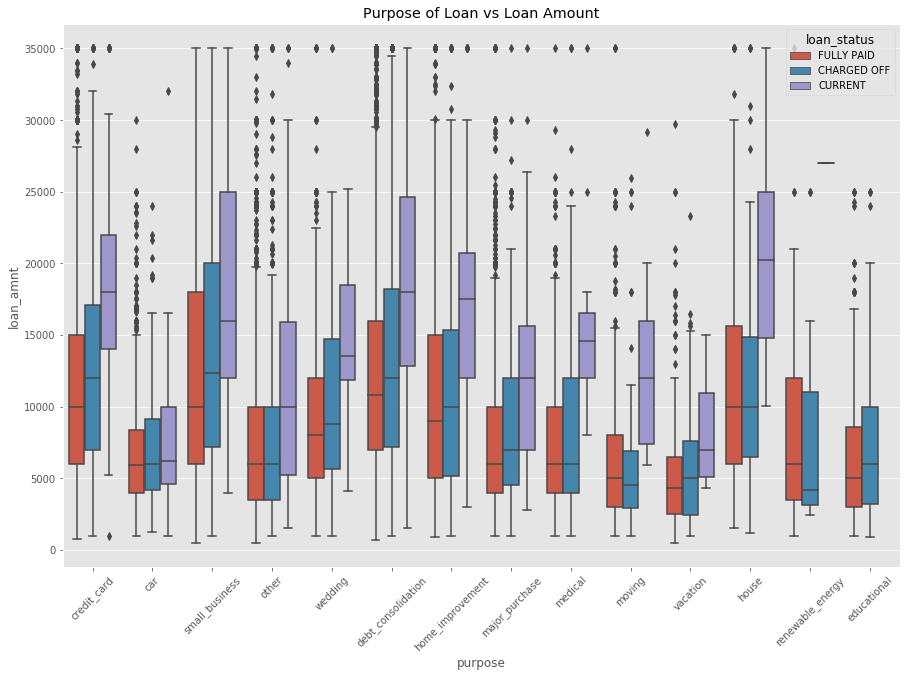

In [37]:
plt.figure(figsize=(15,10))
ax=sns.boxplot(data =loan_cleaned_df, x='purpose', y='loan_amnt', hue ='loan_status')
#ax.set_xticklabels(loan_cleaned_df['purpose'],rotation=45)
plt.title('Purpose of Loan vs Loan Amount')
plt.xticks(rotation=45)

5.2. Loan amount Vs Open credit line
  - The data is very dense between 20 credit line and 20000 loan amount.Which mean most of the people less than 20 lines apply amount for <=20000

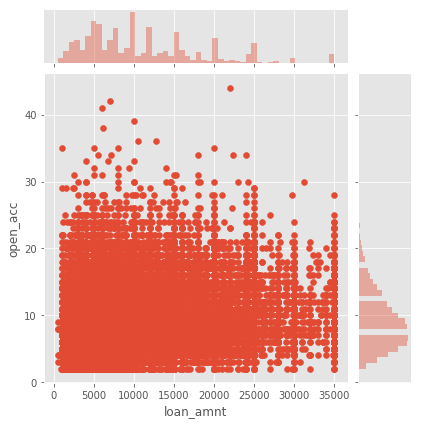

In [38]:
# joint plot showing scatter and bar plot for loan)amnt vs open_acc

sns.jointplot(x='loan_amnt',y='open_acc',data=loan_cleaned_df)

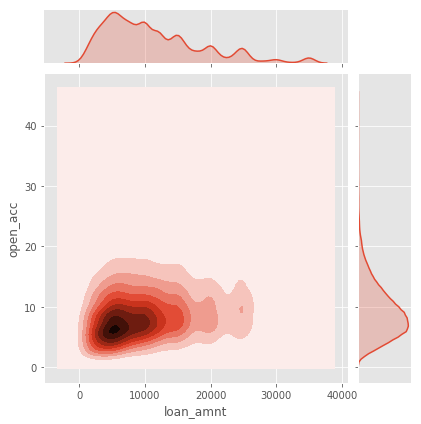

In [39]:
# joint plot showing scatter and density plot for loan)amnt vs open_acc

sns.jointplot(x='loan_amnt',y='open_acc',data=loan_cleaned_df,kind='kde')

5.3. Joint Plots

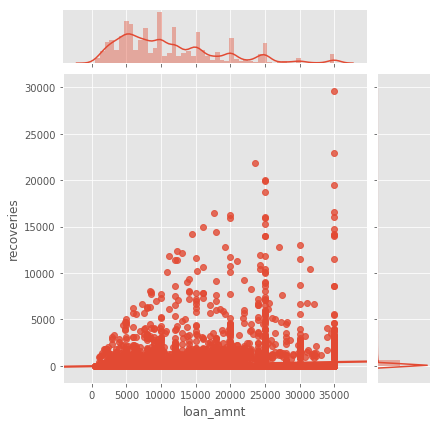

In [40]:
# joint plot showing scatter and bar plot for loan)amnt vs open_acc

sns.jointplot(x='loan_amnt',y='recoveries',data=loan_cleaned_df,kind='reg')  

5.4. PairPlot

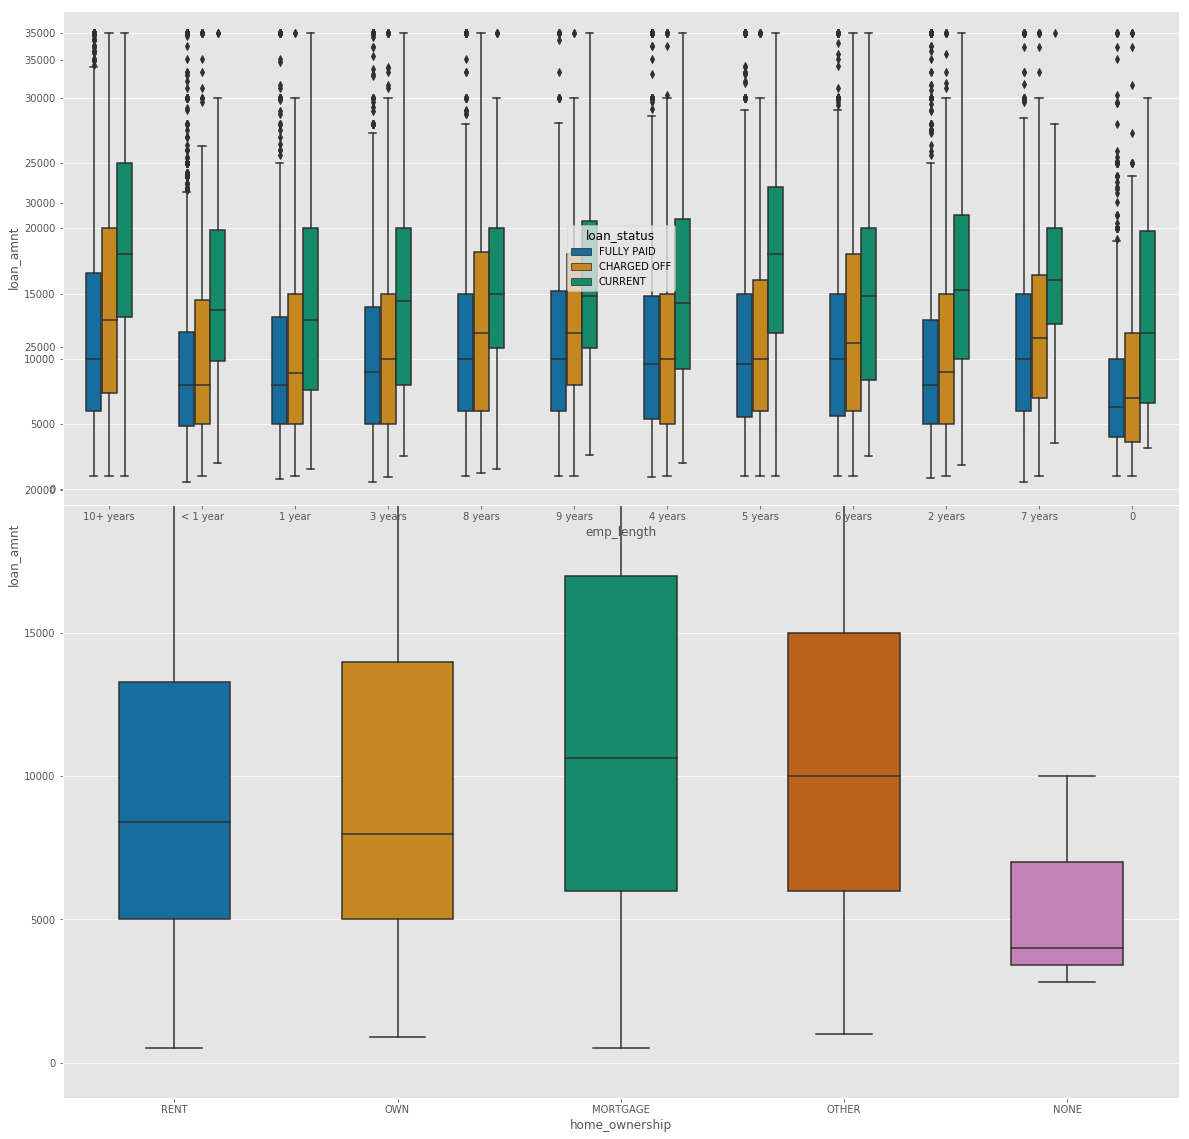

In [41]:
fig = plt.figure(figsize=(20,20))
fig.add_subplot(1,1,1)

# box plot loan_amnt vs home_ownership
sns.boxplot(y='loan_amnt', x='home_ownership', 
                 data=loan_cleaned_df, 
                 width=.5,
                 palette="colorblind")

# box plot loan_amnt vs emp_length
fig.add_subplot(2,1,1)
sns.boxplot(y='loan_amnt', x='emp_length', 
                 data=loan_cleaned_df, 
                 width=.5,
               hue='loan_status',
                 palette="colorblind")

In [42]:
loanstatus=loan_cleaned_df.pivot_table(index=['loan_status','purpose','emp_length','sub_grade'],values='loan_amnt',aggfunc=('count')).reset_index()
loanstatus=loanstatus[loanstatus['loan_status']=='CHARGED OFF']

5.5 Correlation and correaltion heat map

In [43]:
loan_cleaned_df.corr().style.background_gradient()

,loan_amnt,funded_amnt,int_rate,annual_inc,dti,delinq_2yrs,mths_since_last_delinq,open_acc,pub_rec,revol_bal,total_acc,out_prncp,total_pymnt,total_rec_prncp,recoveries,pub_rec_bankruptcies,loan_income_ratio
loan_amnt,1,0.9816,0.30732,0.416479,0.0734163,-0.0336826,0.0159924,0.174771,-0.0498467,0.313795,0.251876,0.194366,0.885553,0.850345,0.136568,-0.0358366,0.622146
funded_amnt,0.9816,1,0.311012,0.412013,0.0730657,-0.0339725,0.017465,0.172947,-0.0507437,0.30606,0.245961,0.196226,0.902096,0.868555,0.137275,-0.0370974,0.610306
int_rate,0.30732,0.311012,1,0.0748405,0.113856,0.157209,-0.0563259,0.00710123,0.0984217,0.0927284,-0.0480976,0.134385,0.306095,0.184235,0.123088,0.083537,0.217197
annual_inc,0.416479,0.412013,0.0748405,1,-0.11466,0.031337,-0.0157238,0.256839,-0.0215317,0.423575,0.37133,0.059407,0.395806,0.397836,0.0383247,-0.0204405,-0.310107
dti,0.0734163,0.0730657,0.113856,-0.11466,1,-0.0335896,0.0668505,0.29183,-0.0054476,0.241334,0.235565,0.037289,0.0717283,0.047979,0.0253751,0.00513037,0.141791
delinq_2yrs,-0.0336826,-0.0339725,0.157209,0.031337,-0.0335896,1,-0.569212,0.0118163,0.007963,-0.0579003,0.0668677,-0.00284372,-0.0247685,-0.0409122,0.0119604,0.00381008,-0.0624931
mths_since_last_delinq,0.0159924,0.017465,-0.0563259,-0.0157238,0.0668505,-0.569212,1,0.0235639,0.0589874,0.0176032,0.00811944,0.00570908,0.0130918,0.0170162,-0.00763824,0.0256433,0.018468
open_acc,0.174771,0.172947,0.00710123,0.256839,0.29183,0.0118163,0.0235639,1,0.0010852,0.288556,0.686183,0.0287175,0.159943,0.15826,0.0159586,0.0068838,-0.039716
pub_rec,-0.0498467,-0.0507437,0.0984217,-0.0215317,-0.0054476,0.007963,0.0589874,0.0010852,1,-0.0614107,-0.022757,-0.0125863,-0.0522925,-0.0641263,-0.00542673,0.847179,-0.0384595
revol_bal,0.313795,0.30606,0.0927284,0.423575,0.241334,-0.0579003,0.0176032,0.288556,-0.0614107,1,0.310943,0.0611834,0.288106,0.276001,0.0441749,-0.0484393,0.000556688


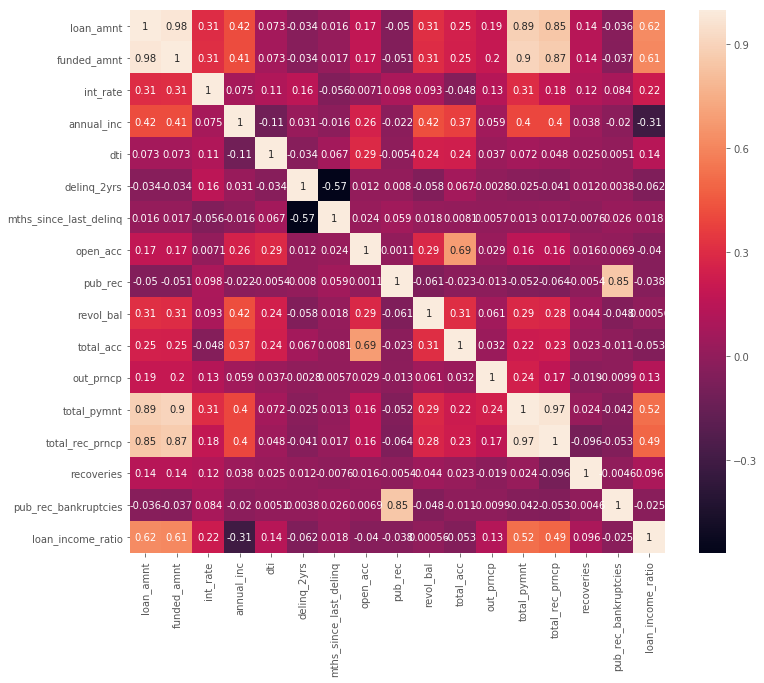

In [44]:
plt.figure(figsize=(12,10))
sns.heatmap(loan_cleaned_df.corr(),annot=True)

# <font color = blue> 6. Business Objective inferences</font>
The attributes which contibute to Charge off or Defaults

### We need to identify the features which are contributing to loan charge off.To find that percentage of the charged off category to total application submitted in the category.    
$Percentage of ChargedOff=\dfrac{Charged off loan count for the category}{Total loan count for the category}*100 $  

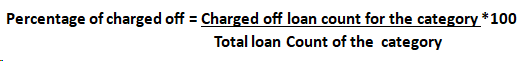

### As need to do it with more number of features is better idea to create following function for ease of coding
  1. precent_charged_off : to find the percentage loan which are charged off
  2. plot_precent : to plot the data obtained from function in point 1

In [45]:
def precent_charged_off(data_frame,col):
    
    tabing=pd.crosstab(data_frame[col],data_frame['loan_status'],margins=True)
    tabing['percentage_charge_off']=round((tabing['CHARGED OFF']/tabing['All'])*100,3)
    return tabing.iloc[:-1,:]

def plot_precent(data_frame,col,stacked=True):
    
    plot_percent=precent_charged_off(data_frame,col)

    lineplt=plot_percent[['percentage_charge_off']]
    barplt=plot_percent.iloc[:,:3]
    ax=lineplt.plot(kind='line',marker='o',color='g',figsize=(20,8))
    ax2=barplt.plot(kind='bar',secondary_y=True,ax=ax,alpha=.8,stacked=stacked)
    ax.set_title(data_frame[col].name.title()+' vs Percentage Charge Off',fontsize=20,weight="bold")
    ax.set_xlabel(data_frame[col].name.title(),fontsize=14)
    ax.set_ylabel('Percentage of Charged off',color = 'b',fontsize=14)
    ax2.set_ylabel('Number of Applicants',color = 'g',fontsize=14)

- Puspose of Small Business  is showing more charged off percentage i.e. 26% approx. (refer the above for Percentenage charge off calulation)
- As per crosstab chart without precentage chargeoff shown purpose=debt_consolidation have highest count of loan_status as 'Charged_Off'. This is because we are comapring the category against the whole population. However we need category wise information which gives more insights on which category is defaulted highly when compared to itself data


Text(0.5,1,'Over All Population')

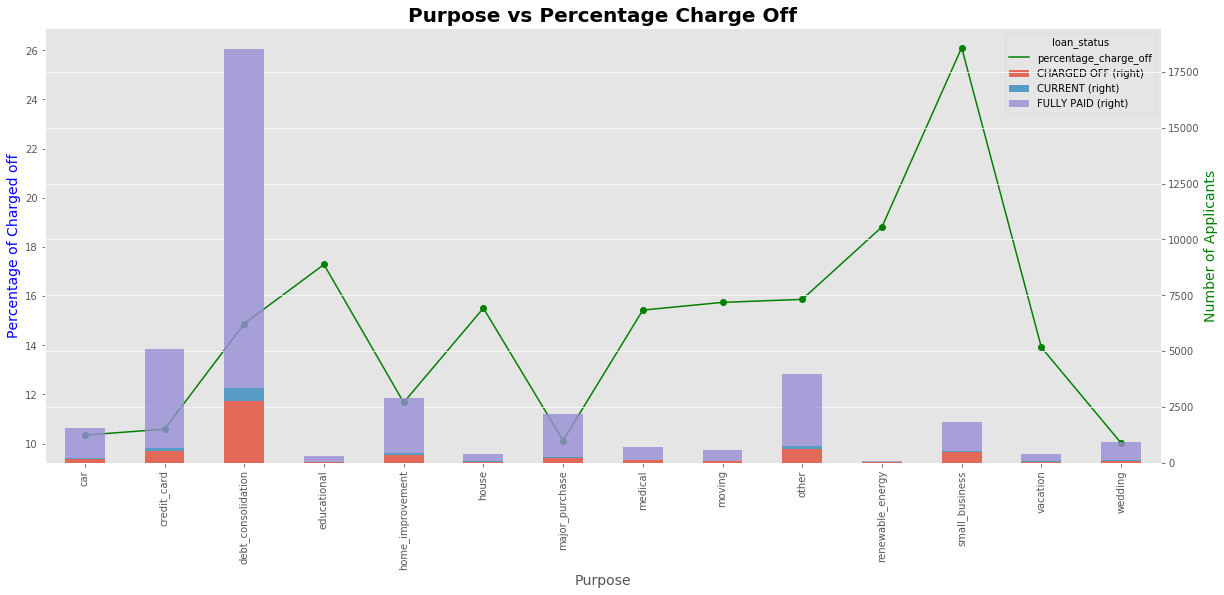

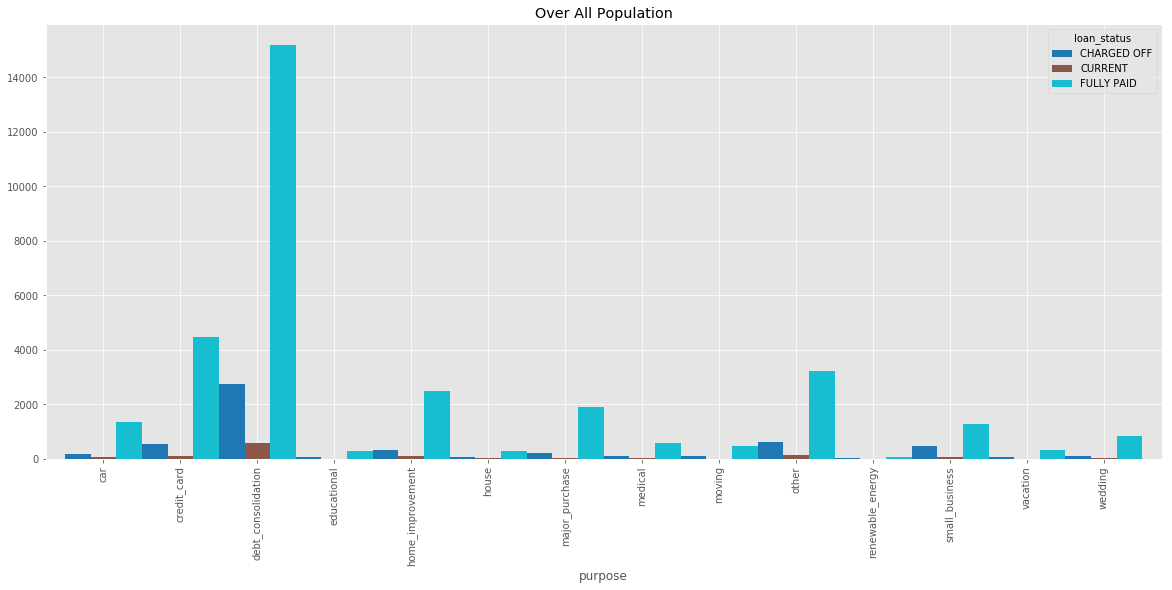

In [46]:
plot_precent(loan_cleaned_df,'purpose')
ax=pd.crosstab(loan_cleaned_df.purpose, loan_cleaned_df.loan_status).plot.bar(width = 1, figsize=(20,8), colormap='tab10')
ax.set_title('Over All Population')

- Home_owner ship as Others category has high charged off rate of 18% approx followed by  

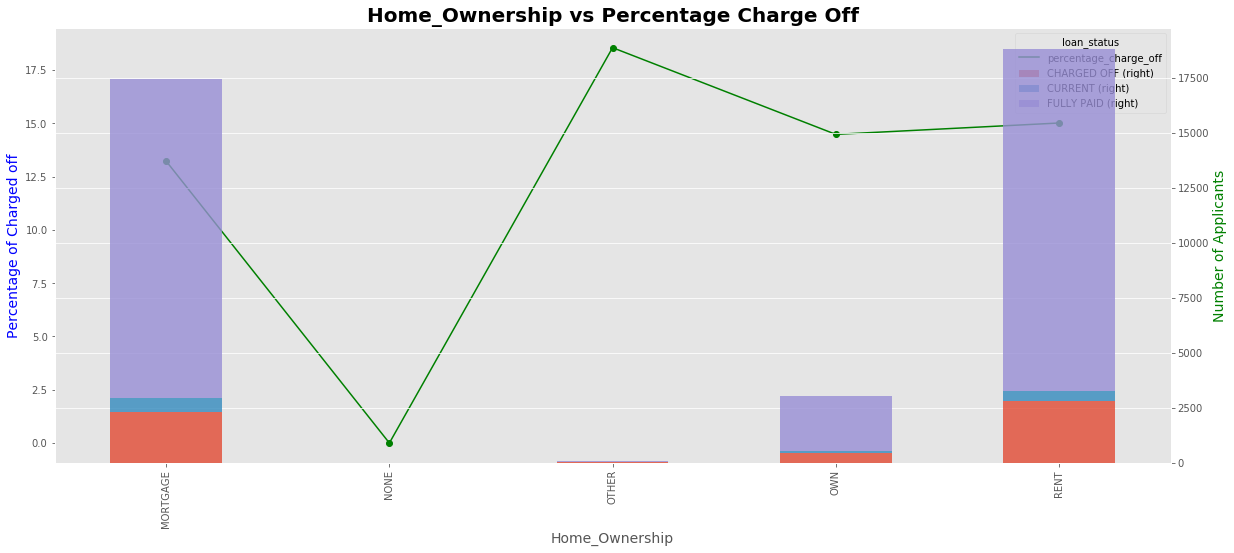

In [47]:
plot_precent(loan_cleaned_df,'home_ownership')

- Total Cedit line having 4  contribute to 21% charged off.We didnt consider credit line with 72 and 76 thoug its 100% because the sum of loan amount is less than 20k however for credit line 4 its $2M

In [48]:
precent_charged_off(loan_cleaned_df,'total_acc')

loan_status,CHARGED OFF,CURRENT,FULLY PAID,All,percentage_charge_off
total_acc,,,,,
2,1,0,3,4,25.00
3,42,3,137,182,23.08
4,79,5,335,419,18.85
5,90,9,452,551,16.33
6,105,9,567,681,15.42
7,132,15,681,828,15.94
8,171,17,815,1003,17.05
9,166,23,890,1079,15.38
10,187,21,981,1189,15.73


In [49]:
loan_cleaned_df.loc[loan_cleaned_df.total_acc.isin([4]),['loan_amnt']].sum()

loan_amnt    2487750
dtype: int64

Text(0.5,1,'Over All Population Analysis of')

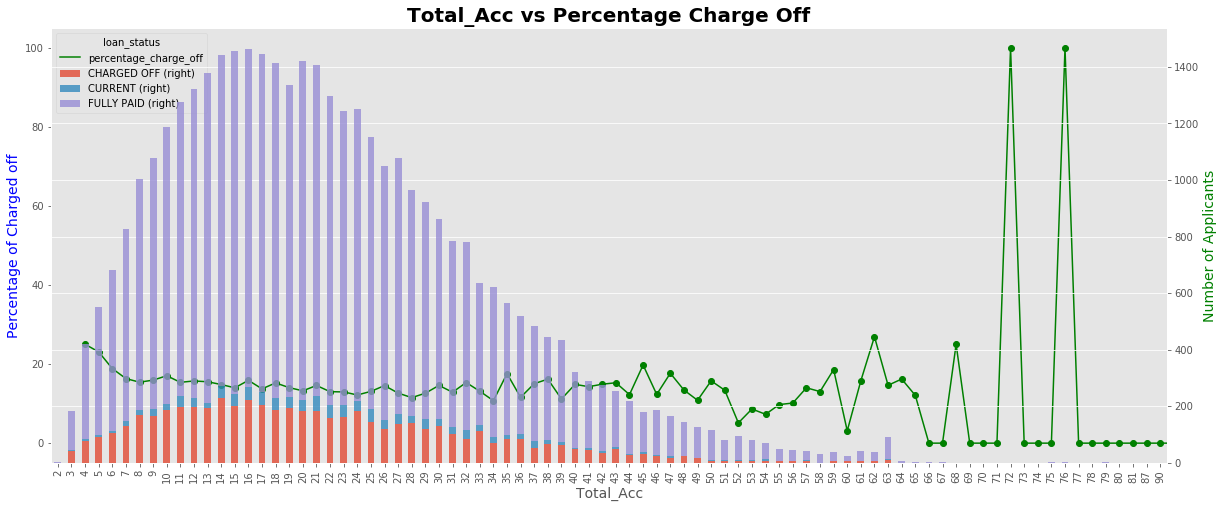

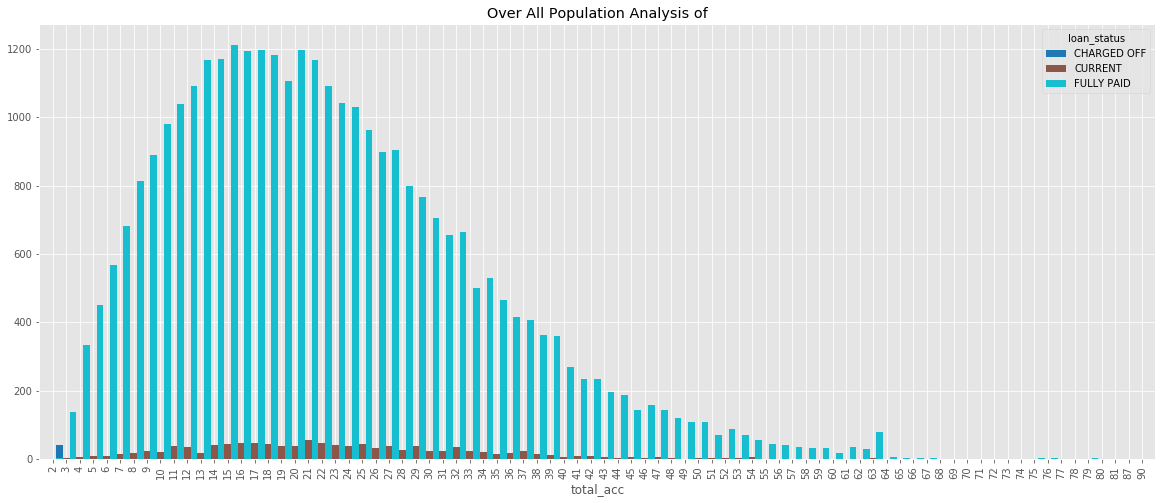

In [50]:
# cross-tab plot to view effect of total_acc on loan_status
plot_precent(loan_cleaned_df,'total_acc')

ax=pd.crosstab(loan_cleaned_df.total_acc, loan_cleaned_df.loan_status).plot.bar(width = 1.5, figsize=(20,8), colormap='tab10')
ax.set_title('Over All Population Analysis of')

- Loan amount range shown between 15000-25000 are high of default.

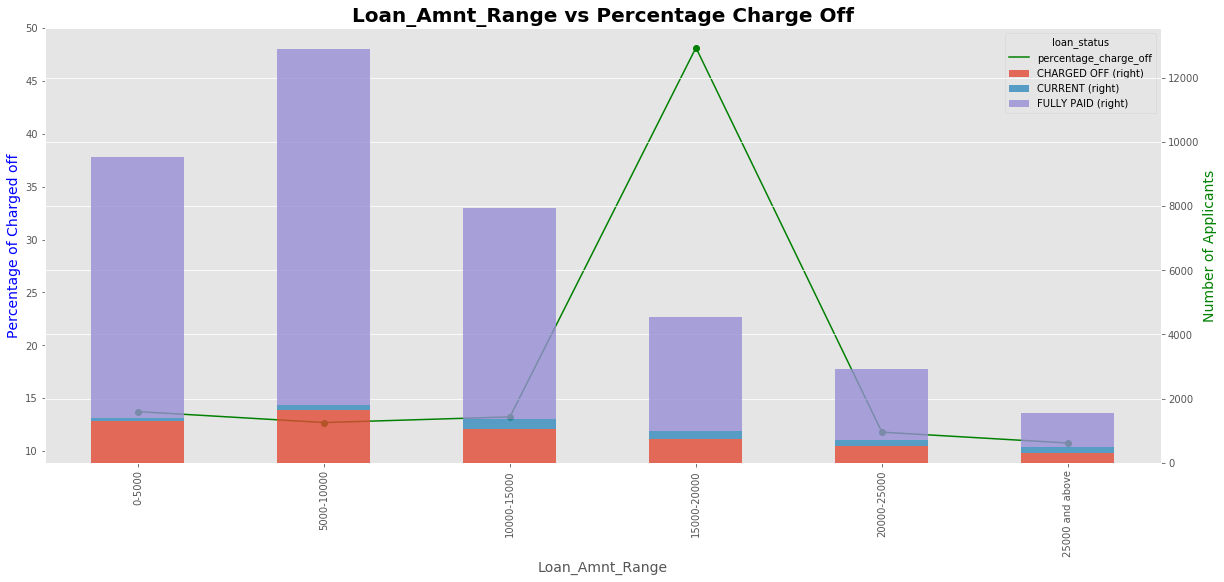

In [51]:
plot_precent(loan_cleaned_df,'loan_amnt_range')

Outcome of above cross-tab plot-  
 People with mths_since_last_delinq 0.0 have highest count of loan_status as 'Charged_Off'

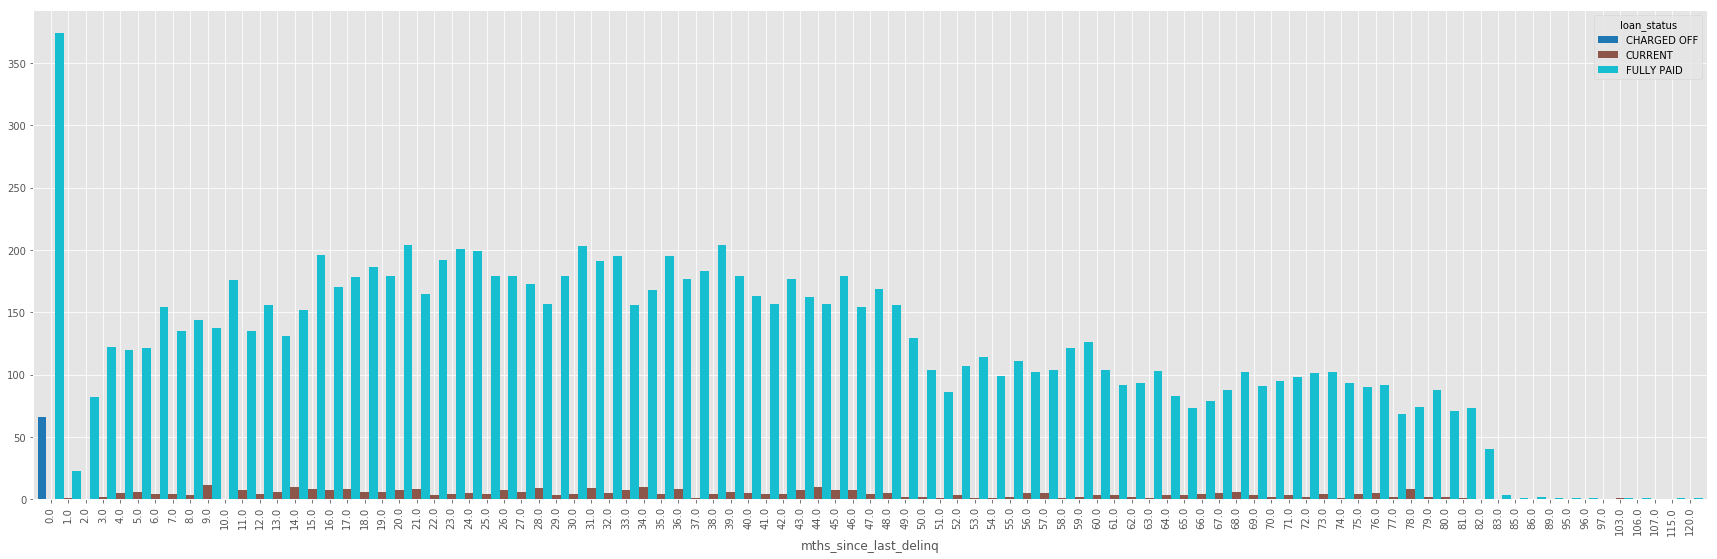

In [52]:
# cross-tab plot to view effect of mths_since_last_delinq on loan_status

pd.crosstab(loan_cleaned_df.mths_since_last_delinq, loan_cleaned_df.loan_status).plot.bar(width = 1.5, figsize=(30,9), colormap='tab10')

- Annual income range between 50000-75000 tend to default more with the category when compared to other categories of Annual income range

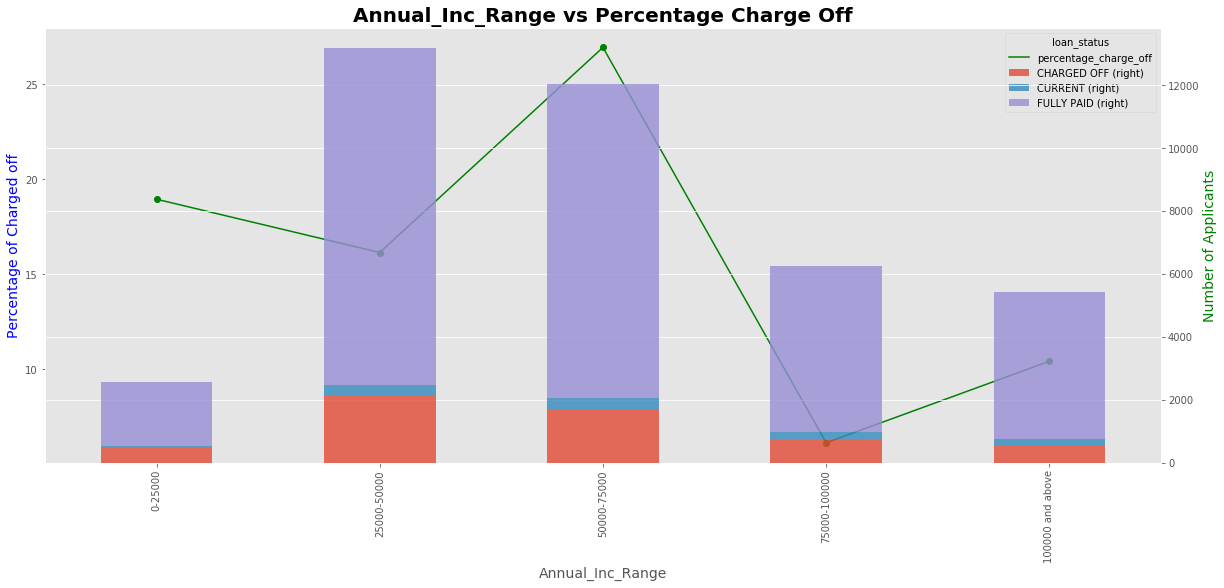

In [53]:
plot_precent(loan_cleaned_df,'annual_inc_range')

Outcome of above cross-tab plot-
1. People with delinq_2yrs 0 have highest count of loan_status as 'Charged_Off'
2. People with delinq_2yrs 1 have second highest count of loan_status as 'Charged_Off'

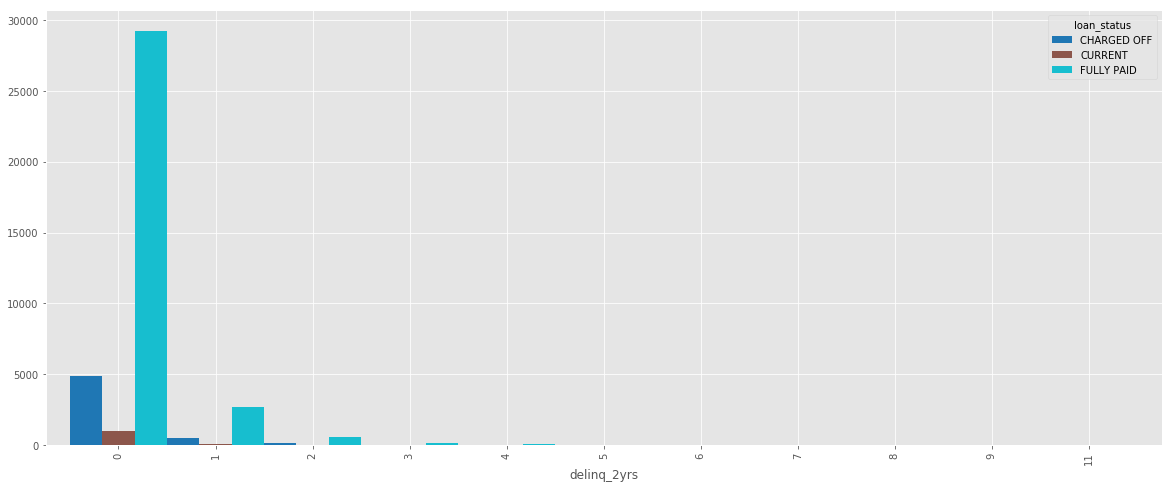

In [54]:
# cross-tab plot to view effect of delinq_2yrs on loan_status

pd.crosstab(loan_cleaned_df.delinq_2yrs, loan_cleaned_df.loan_status).plot.bar(width = 1, figsize=(20,8), colormap='tab10')

-  Loan default percentage within categoery increase as sub-grade increases i.e. interest rate increases.
- On in overall population:
  1. People with sub_grade B5 have highest count of loan_status as 'Charged_Off'
  2. People with sub_grade B3 have second highest count of loan_status as 'Charged_Off'

Text(0.5,1,'Over All Population Analysis')

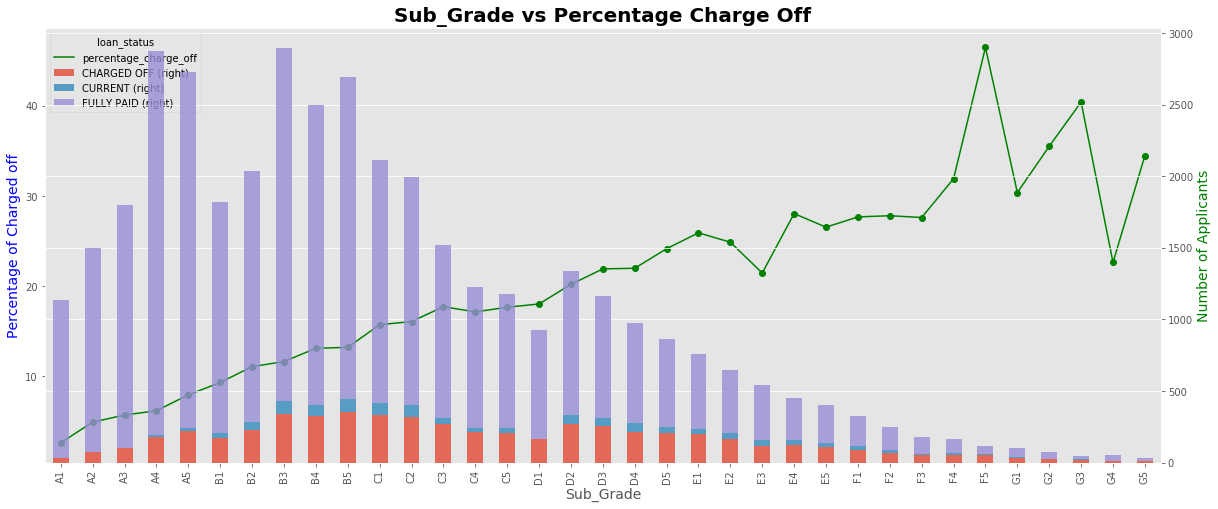

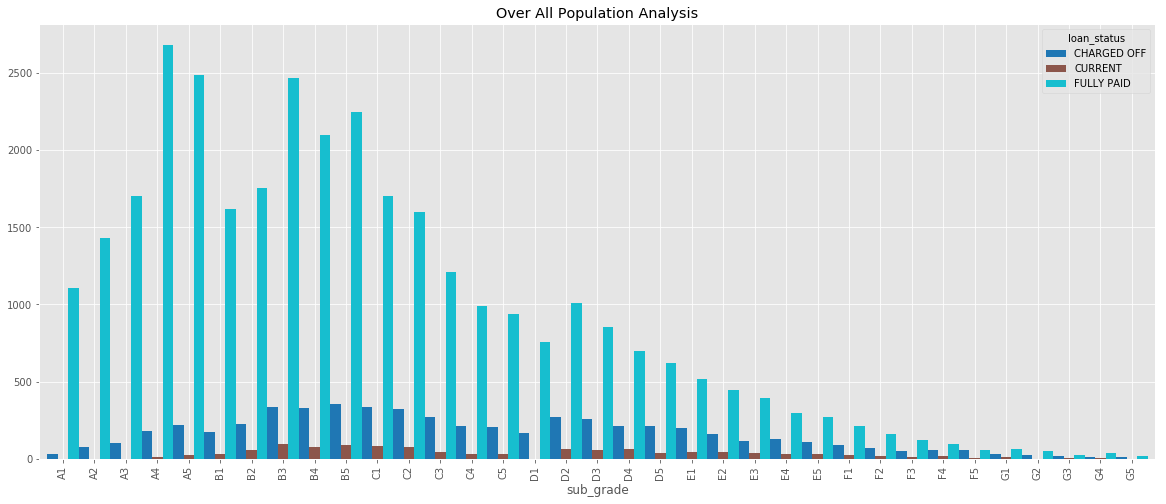

In [55]:
plot_precent(loan_cleaned_df,'sub_grade')
ax=pd.crosstab(loan_cleaned_df.sub_grade, loan_cleaned_df.loan_status).plot.bar(width = 1, figsize=(20,8), colormap='tab10')
ax.set_title('Over All Population Analysis')

-  Within the category, percentrage charge off is more March and Dec
-  On Overall population-
   1. People with issue_d Dec-11 have highest count of loan_status as 'Charged_Off'
   2. People with issue_d Nov-11 have second highest count of loan_status as 'Charged_Off'

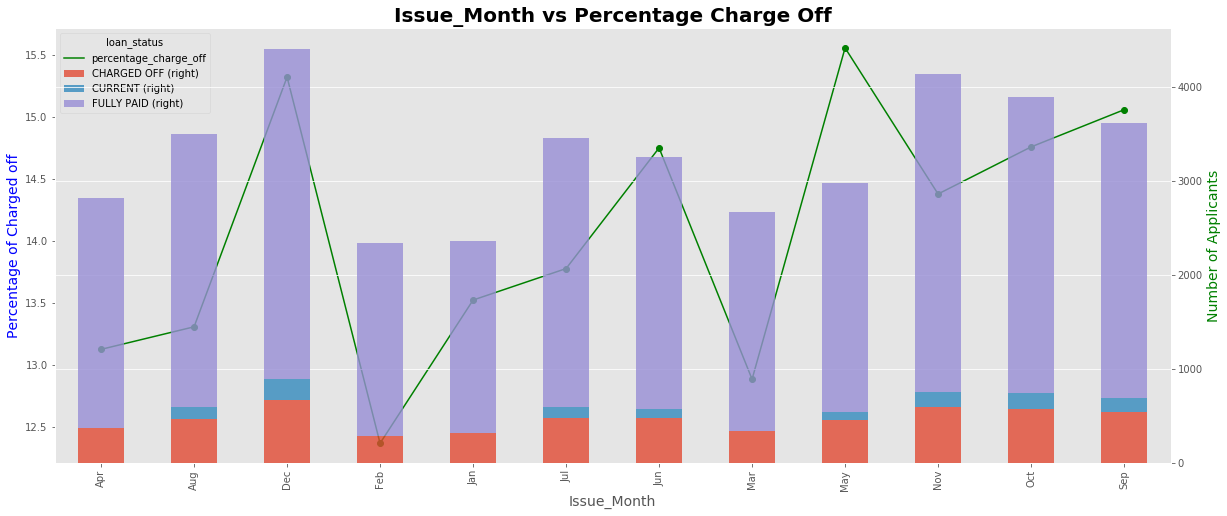

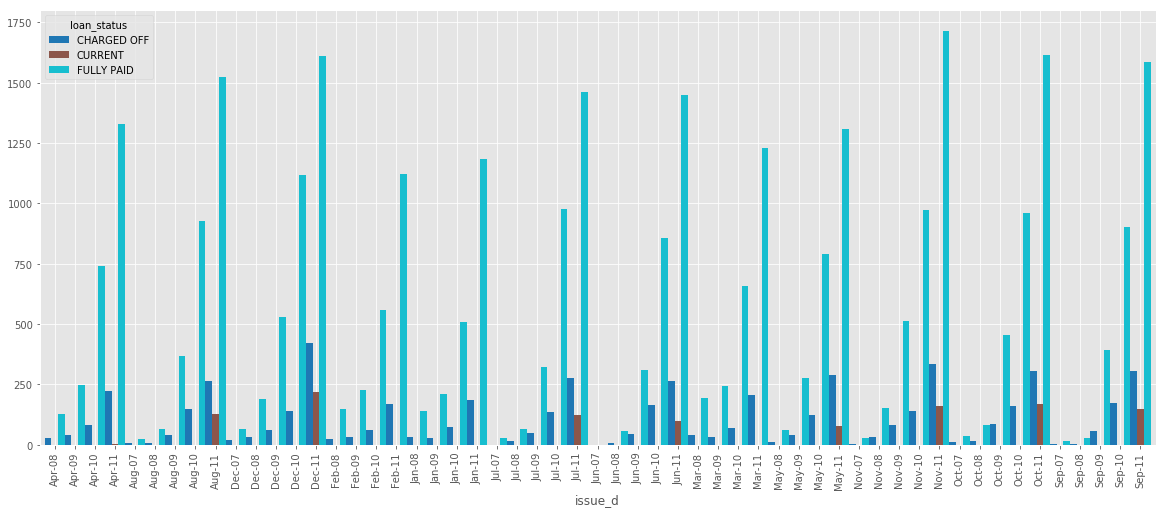

In [56]:
plot_precent(loan_cleaned_df,'issue_month')

# cross-tab plot to view effect of issue_d on loan_status

pd.crosstab(loan_cleaned_df.issue_d, loan_cleaned_df.loan_status).plot.bar(width = 1, figsize=(20,8), colormap='tab10')

-  charged off loan is was increased in 2011 when compared to 2010.

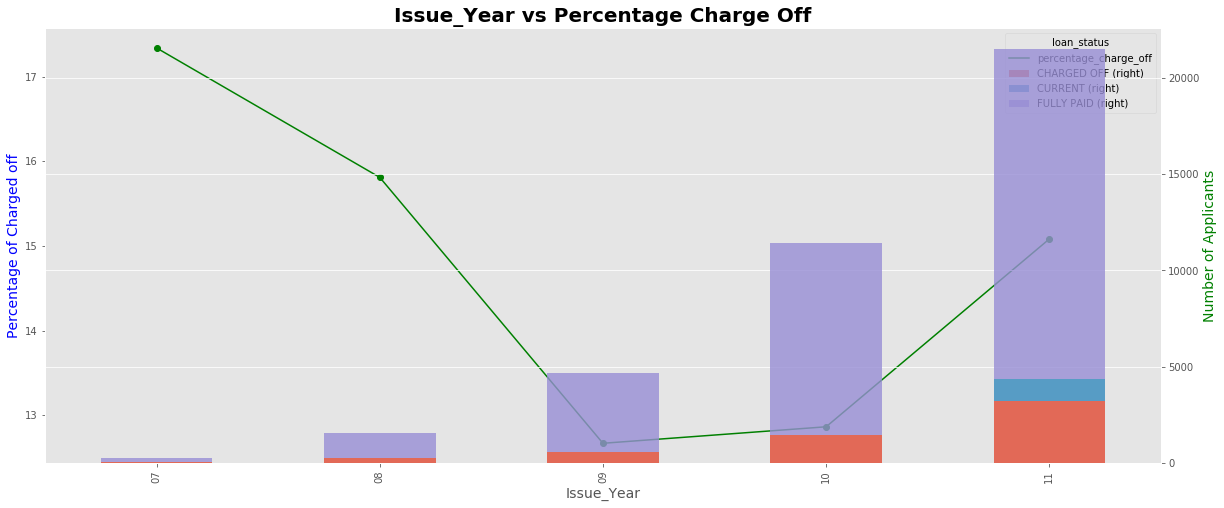

In [57]:
plot_precent(loan_cleaned_df,'issue_year')

In [58]:
loan_cleaned_df.loc[(loan_cleaned_df.addr_state.isin(['CA'])),['loan_amnt']].sum()

loan_amnt    79597950
dtype: int64

-  Within the category NE is defauted amount peers category

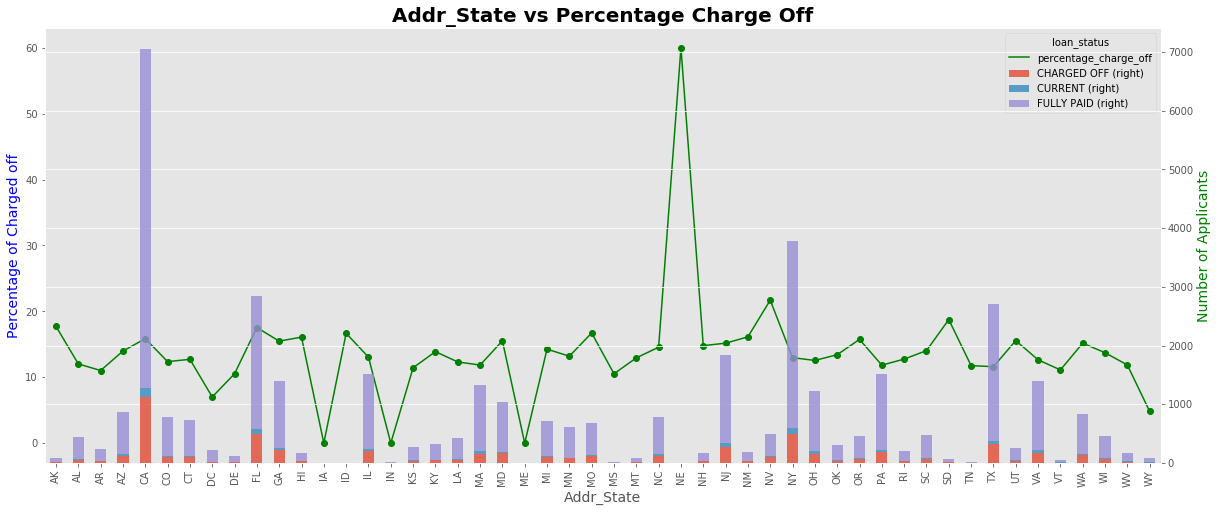

In [59]:
plot_precent(loan_cleaned_df,'addr_state')

-  Outcome of above cross-tab plot-
  1. People with pub_rec 0 have highest count of loan_status as 'Charged_Off'
  2. People with pub_rec 1 have second highest count of loan_status as 'Charged_Off'

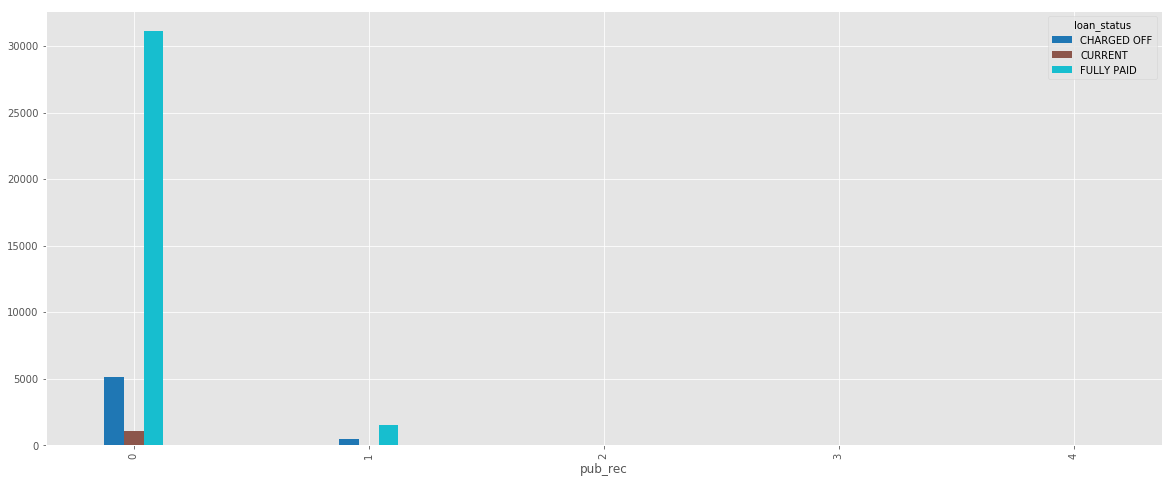

In [60]:
# cross-tab plot to view effect of pub_rec on loan_status

pd.crosstab(loan_cleaned_df.pub_rec, loan_cleaned_df.loan_status).plot.bar(width = 0.25, figsize=(20,8), colormap='tab10')

-  Within a category LC verified applicants are defaulting more
-  In over all population Not verified is contributing more defaults.

Text(0.5,1,'Over All Population Analysis')

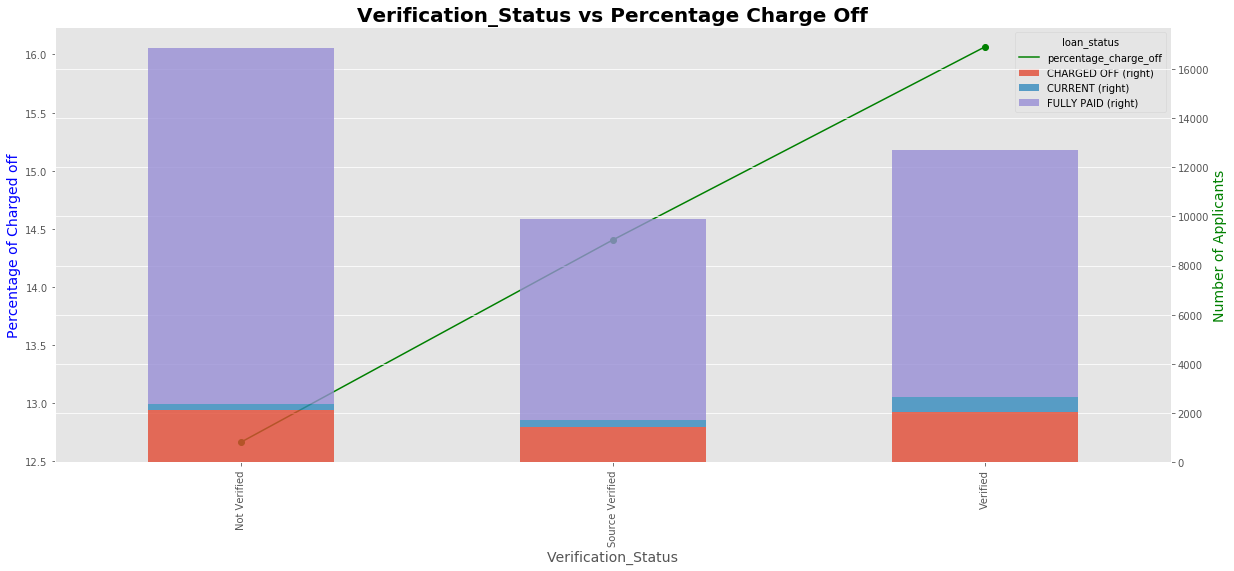

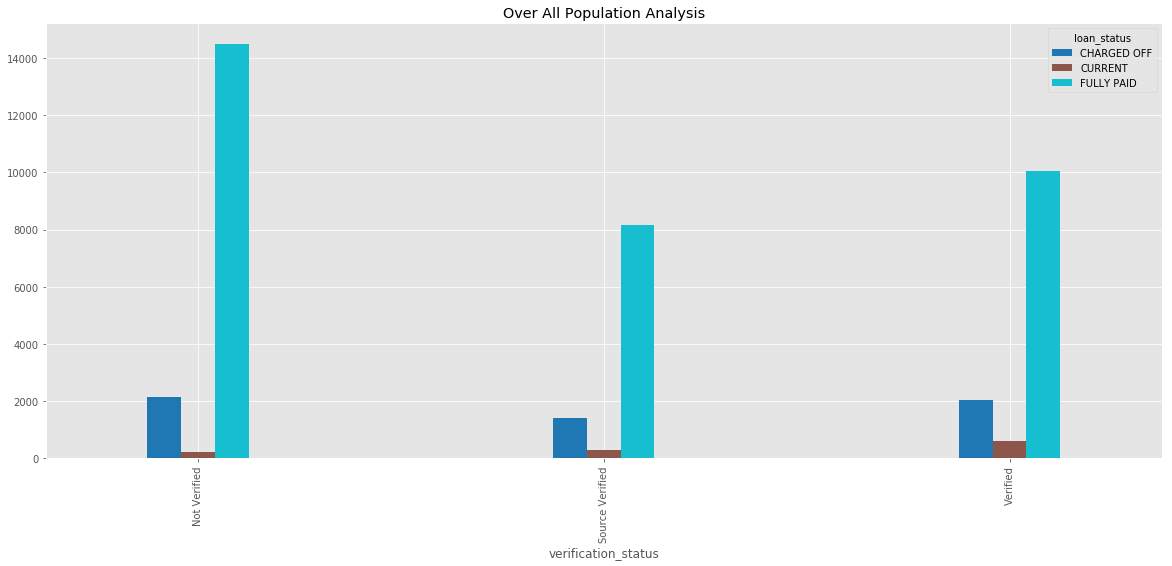

In [61]:
plot_precent(loan_cleaned_df,'verification_status')

# cross-tab plot to view effect of verification_status on loan_status

ax=pd.crosstab(loan_cleaned_df.verification_status, loan_cleaned_df.loan_status).plot.bar(width = 0.25, figsize=(20,8), colormap='tab10')
ax.set_title('Over All Population Analysis')

-  Within category 60 months term is resulting hightes defaults
-  In over population 36 months term is contributing highest for defaults

Text(0.5,1,'Over All Population Analysis')

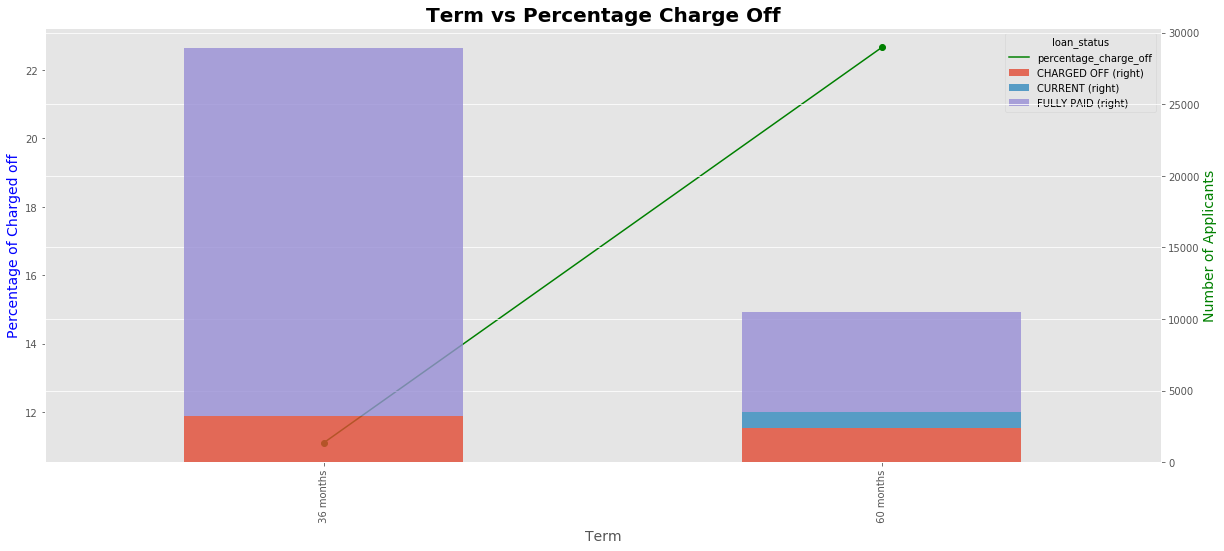

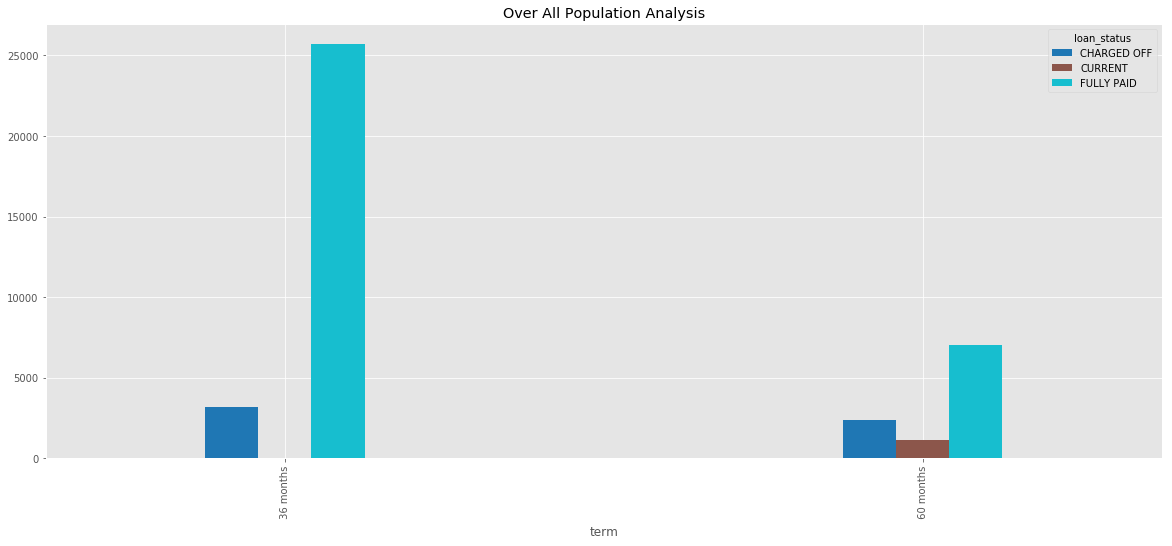

In [62]:
plot_precent(loan_cleaned_df,'term')

# cross-tab plot to view effect of term on loan_status

ax=pd.crosstab(loan_cleaned_df.term, loan_cleaned_df.loan_status).plot.bar(width = 0.25, figsize=(20,8), colormap='tab10')
ax.set_title('Over All Population Analysis')

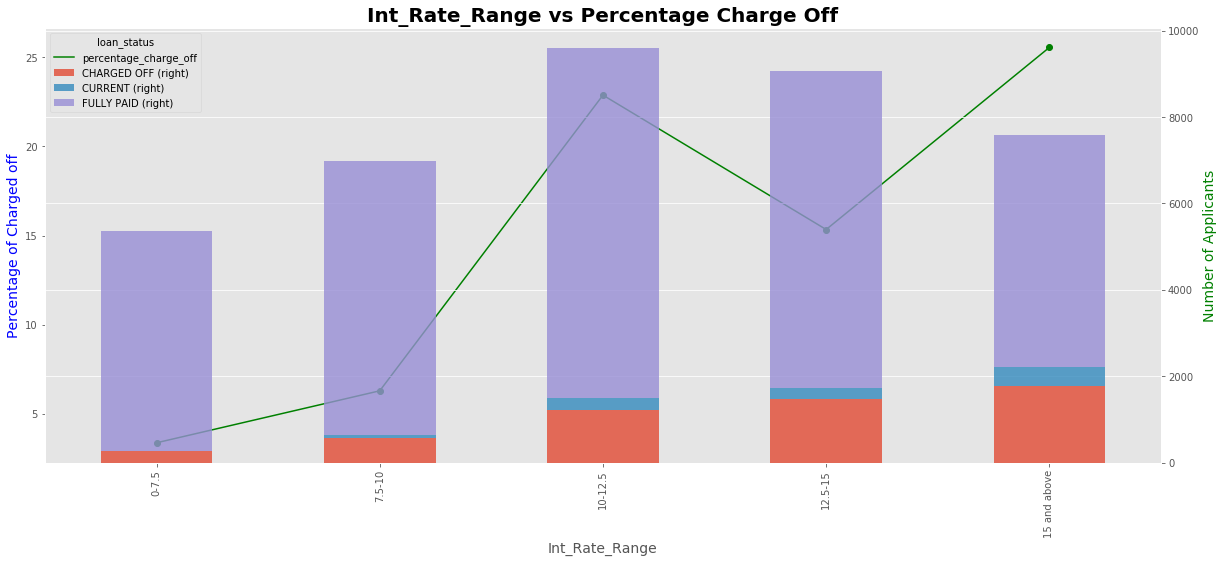

In [63]:
plot_precent(loan_cleaned_df,'int_rate_range')

-  Outcome of above cross-tab plot-
  1. People with emp_length 10+ years have highest count of loan_status as 'Charged_Off'
  2. People with emp_length <1 year have second highest count of loan_status as 'Charged_Off'

Text(0.5,1,'Over All Population Analysis')

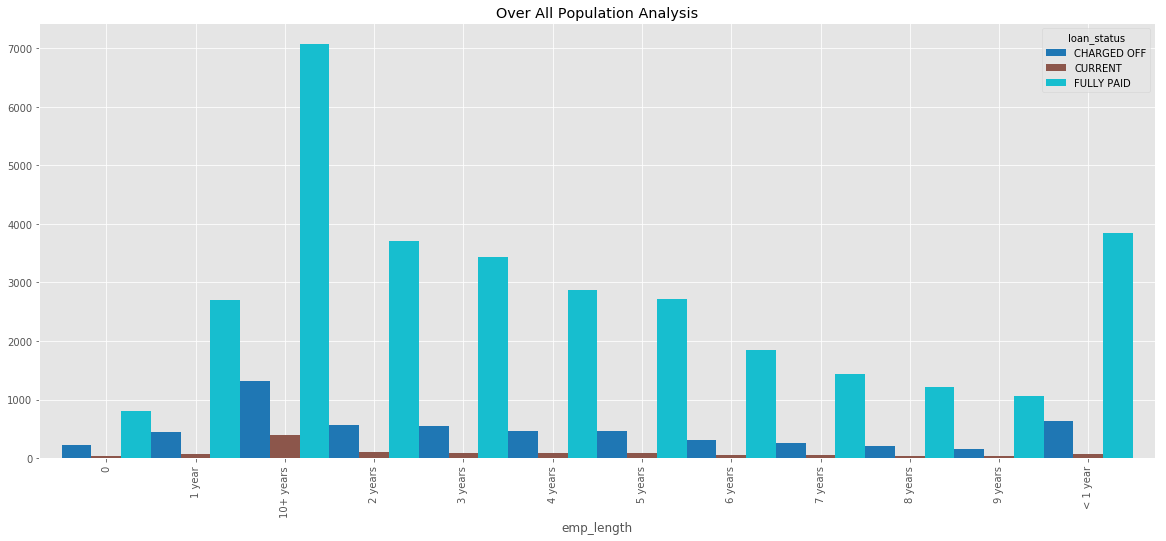

In [64]:
# cross-tab plot to view effect of emp_length on loan_status

ax=pd.crosstab(loan_cleaned_df.emp_length, loan_cleaned_df.loan_status).plot.bar(width = 1, figsize=(20,8), colormap='tab10')
ax.set_title('Over All Population Analysis')